In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [107]:
input_folder_34sigma = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_noise235fb_34sigmathresh_v1/electrons"
input_folder_UL18 = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_noise235fb_UL18thresh_v1/electrons_V2/"
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_noise235fb_summary_v1"
os.makedirs(output_folder, exist_ok=True)

In [108]:
df34 = pd.read_csv( input_folder_34sigma+'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv', sep=",")
dfUL18 = pd.read_csv( input_folder_UL18+'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv', sep=",")

In [161]:
def do_summary_plot(panels, name="res", output=None):

    fig = plt.figure(figsize=(8,4*len(panels) + 1), dpi=250)
    gs = fig.add_gridspec(len(panels), hspace=0.37, height_ratios=[1/len(panels)]*(len(panels)))
    plt.subplots_adjust(left=0.15)
    axs = gs.subplots()

    hep.cms.label(rlabel="14 TeV", llabel="Simulation Preliminary", loc=0, ax=axs[0]) 


    for iP, param in enumerate(panels):
        res = pd.read_csv(param["file1"], sep=",")
        res_must = pd.read_csv(param["file2"], sep=",")
        ax = axs[iP]

        x = []
        errx = []
        bins1 = param["bins1"]
        bins2 = param["bins2"]
        for i in range(len(bins1)-1):
            errx.append((bins1[i+1]- bins1[i])/2)
            x.append((bins1[i+1]+ bins1[i])/2)

        res.loc[res[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0
        res_must.loc[res_must[param["binCol1"]] == param["exclude_x_bin"], [param["yvar"]]] = 0


        for ibin, bin in enumerate(bins2[:-1]):
            if ibin == param["exclude_y_bin"]: continue
            rd = res[res[param["binCol2"]]==ibin][param["yvar"]]
            rm = res_must[res_must[param["binCol2"]]==ibin][param["yvar"]]
            var = rd/rm
            if not param["yvar_err"]:
                ax.errorbar(x, var,xerr=errx, fmt=".", linestyle='none', elinewidth=0,
                           label=f"[{bins2[ibin]}, {bins2[ibin+1]}]",  )
            else:
                # Error of the ratio
                deep_err = res[res[param["binCol2"]]==ibin][param["yvar_err"]]
                must_err = res_must[res_must[param["binCol2"]]==ibin][param["yvar_err"]]
                err_ratio = np.sqrt( ((1/rm)**2) * deep_err**2 + ((rd/(rm**2))**2 )*must_err**2 )
                ax.errorbar(x, var,xerr=errx, yerr=err_ratio,
                                fmt=".", linestyle='none', elinewidth=1,
                           label=f"[{bins2[ibin]}, {bins2[ibin+1]}]", )

        ax.set_ylabel(param["ylabel"])
        ax.set_xlabel(param["xlabel"])
        ax.set_ylim(*param["ylims"])

        ax.grid(which="both",axis="y")

        ax.legend(title=param["binleg"], title_fontsize=17, fontsize=17, ncol=3,
                 loc='upper center')

        ax.text(0.05, 0.1, param["general_label"], transform=ax.transAxes, fontsize=18)

        if "fill_between" in param and param["fill_between"]:
            ax.fill_between(param["fill_between"], [param["fill_between_y"][0]]*2,[param["fill_between_y"][1]]*2, color="lightgray", alpha=0.4)
            ax.fill_between(param["fill_between"], [param["fill_between_y"][0]]*2,[param["fill_between_y"][1]]*2, color="lightgray", alpha=0.4)

    if output:
        os.makedirs(output, exist_ok=True)
        os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
        fig.tight_layout()
        fig.savefig(output + f"/summary_{name}_ratio.png")
        fig.savefig(output + f"/summary_{name}_ratio.pdf")
        fig.savefig(output + f"/summary_{name}_ratio.svg")

# Electron resolution

## DeepSC vs Mustache - UL18

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


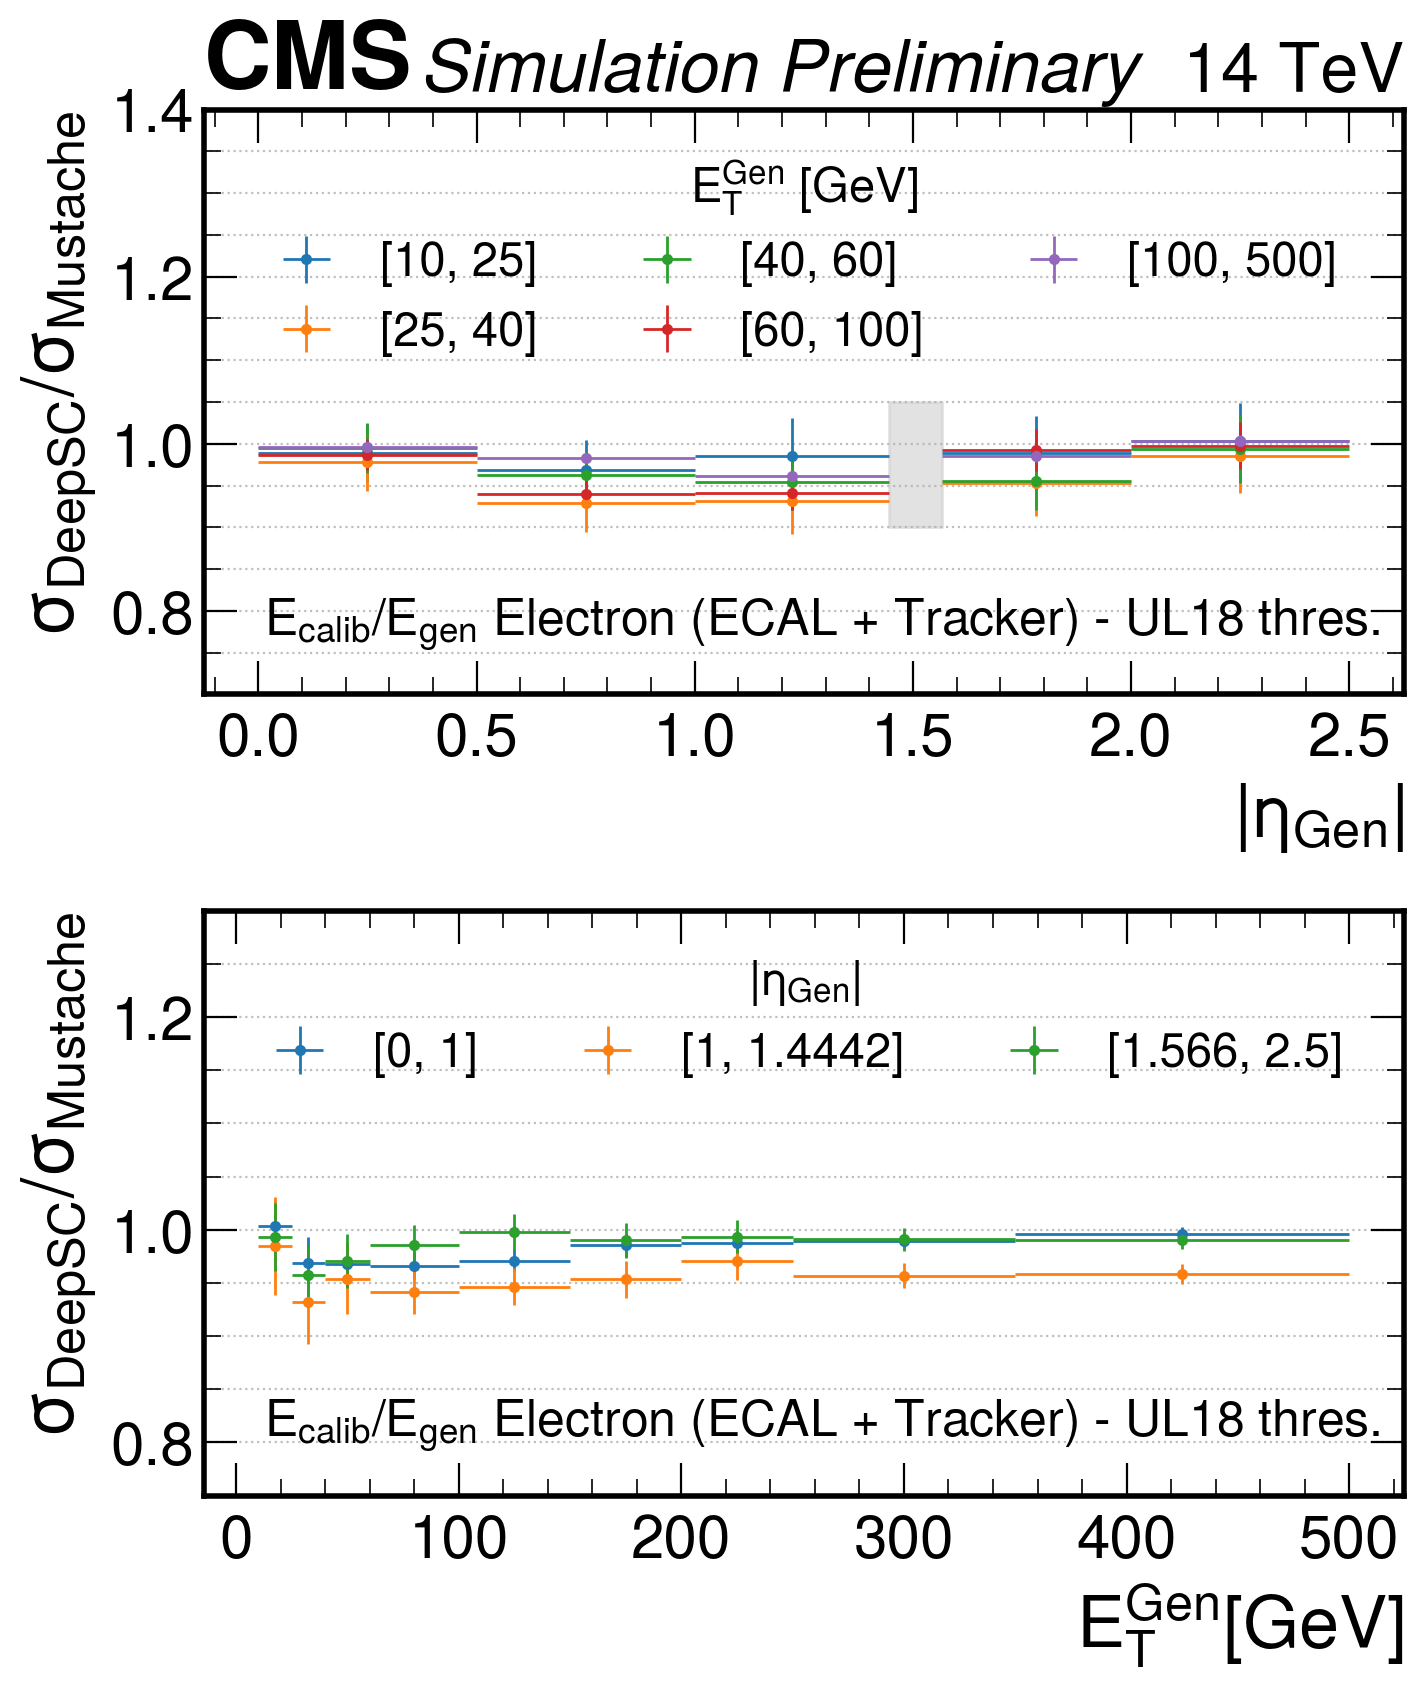

In [141]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - UL18 thres.",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - UL18 thres.",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$",
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_vs_mustache_threshols_UL18", output=output_folder+"/electrons")

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


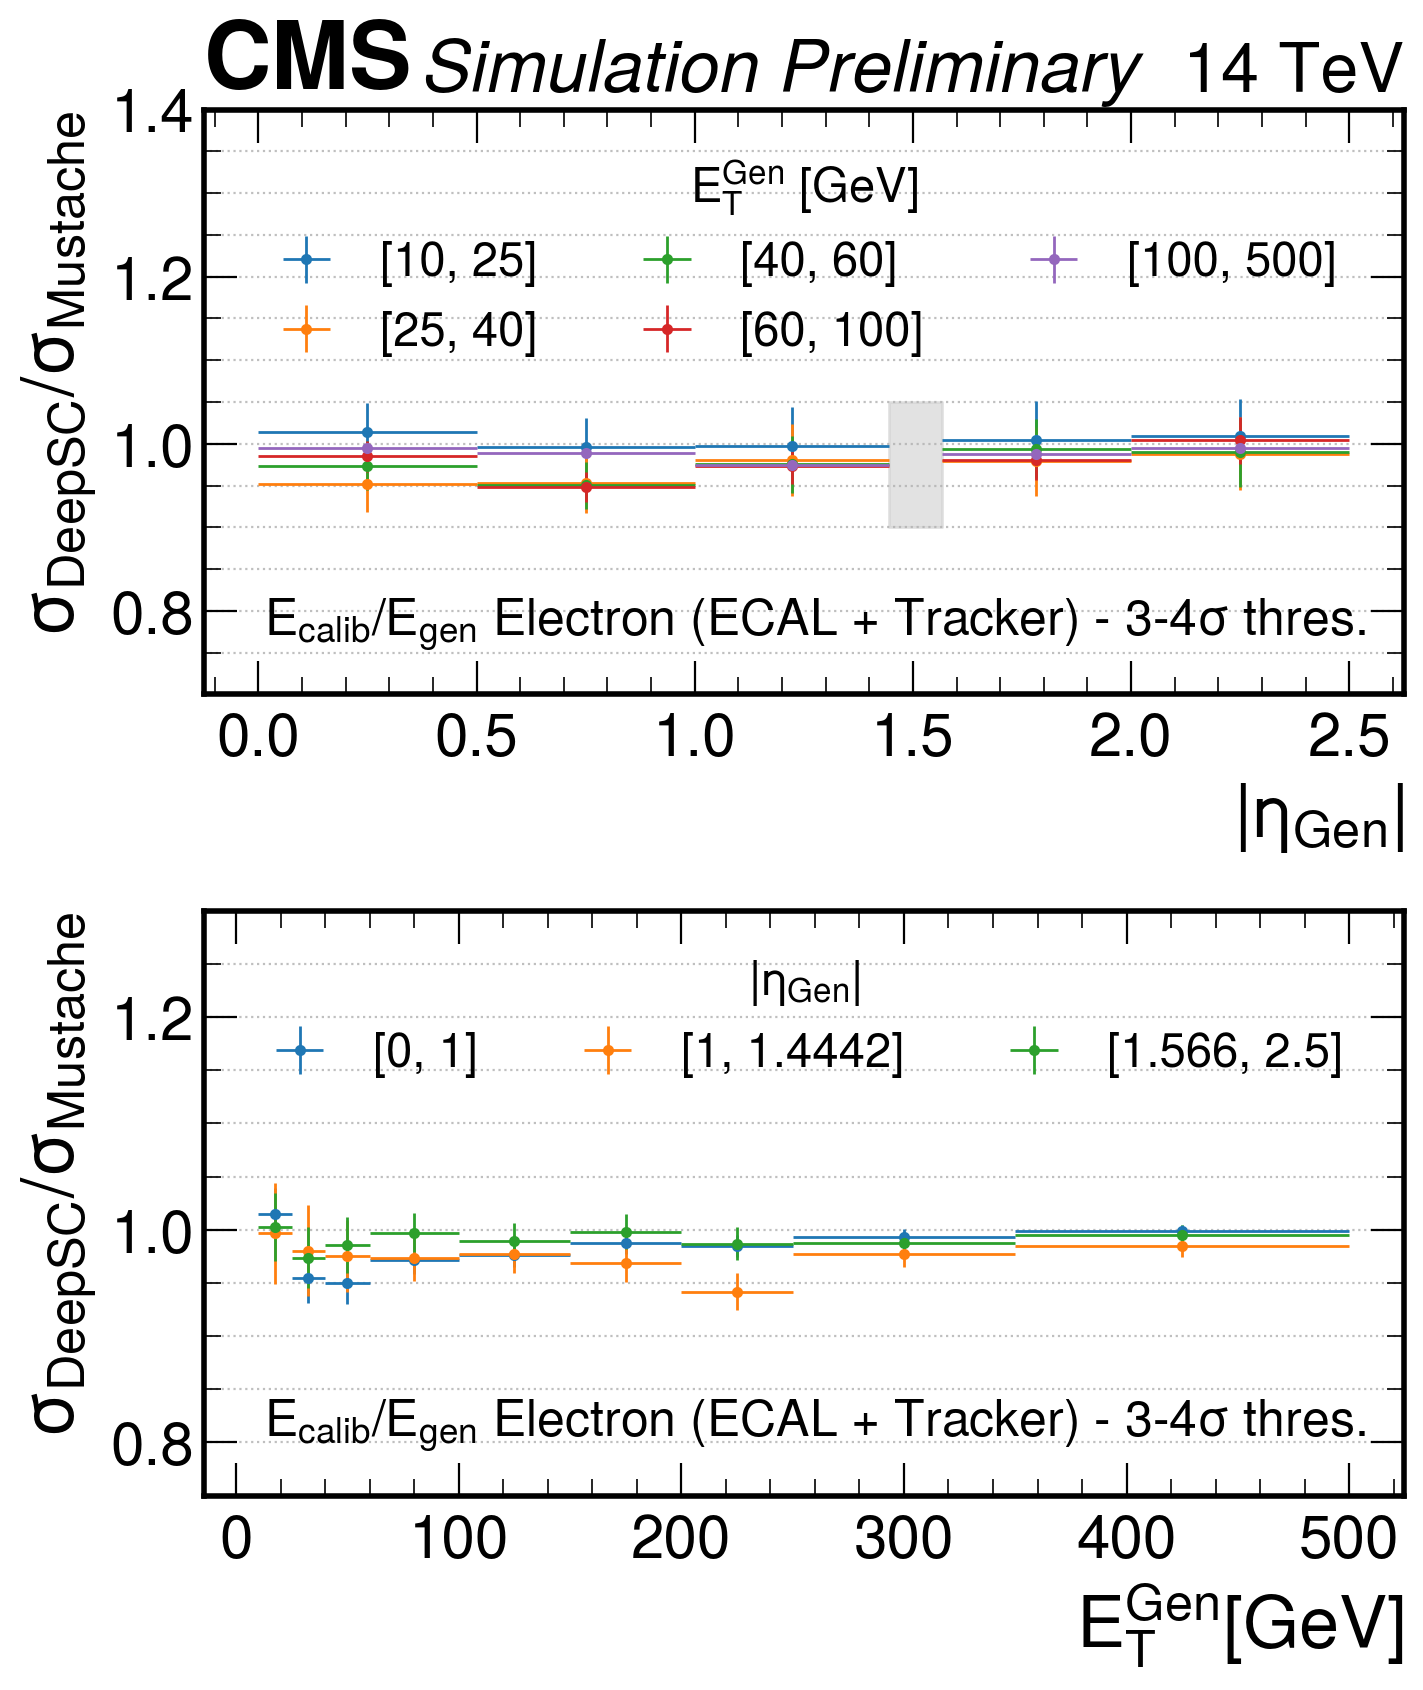

In [142]:

panels_res = [
    {
        "file1": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - 3-4$\sigma$ thres.",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - 3-4$\sigma$ thres.",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$",
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_vs_mustache_threshols_34sigma", output=output_folder+"/electrons")

## Comparison algo vs different thresholds

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


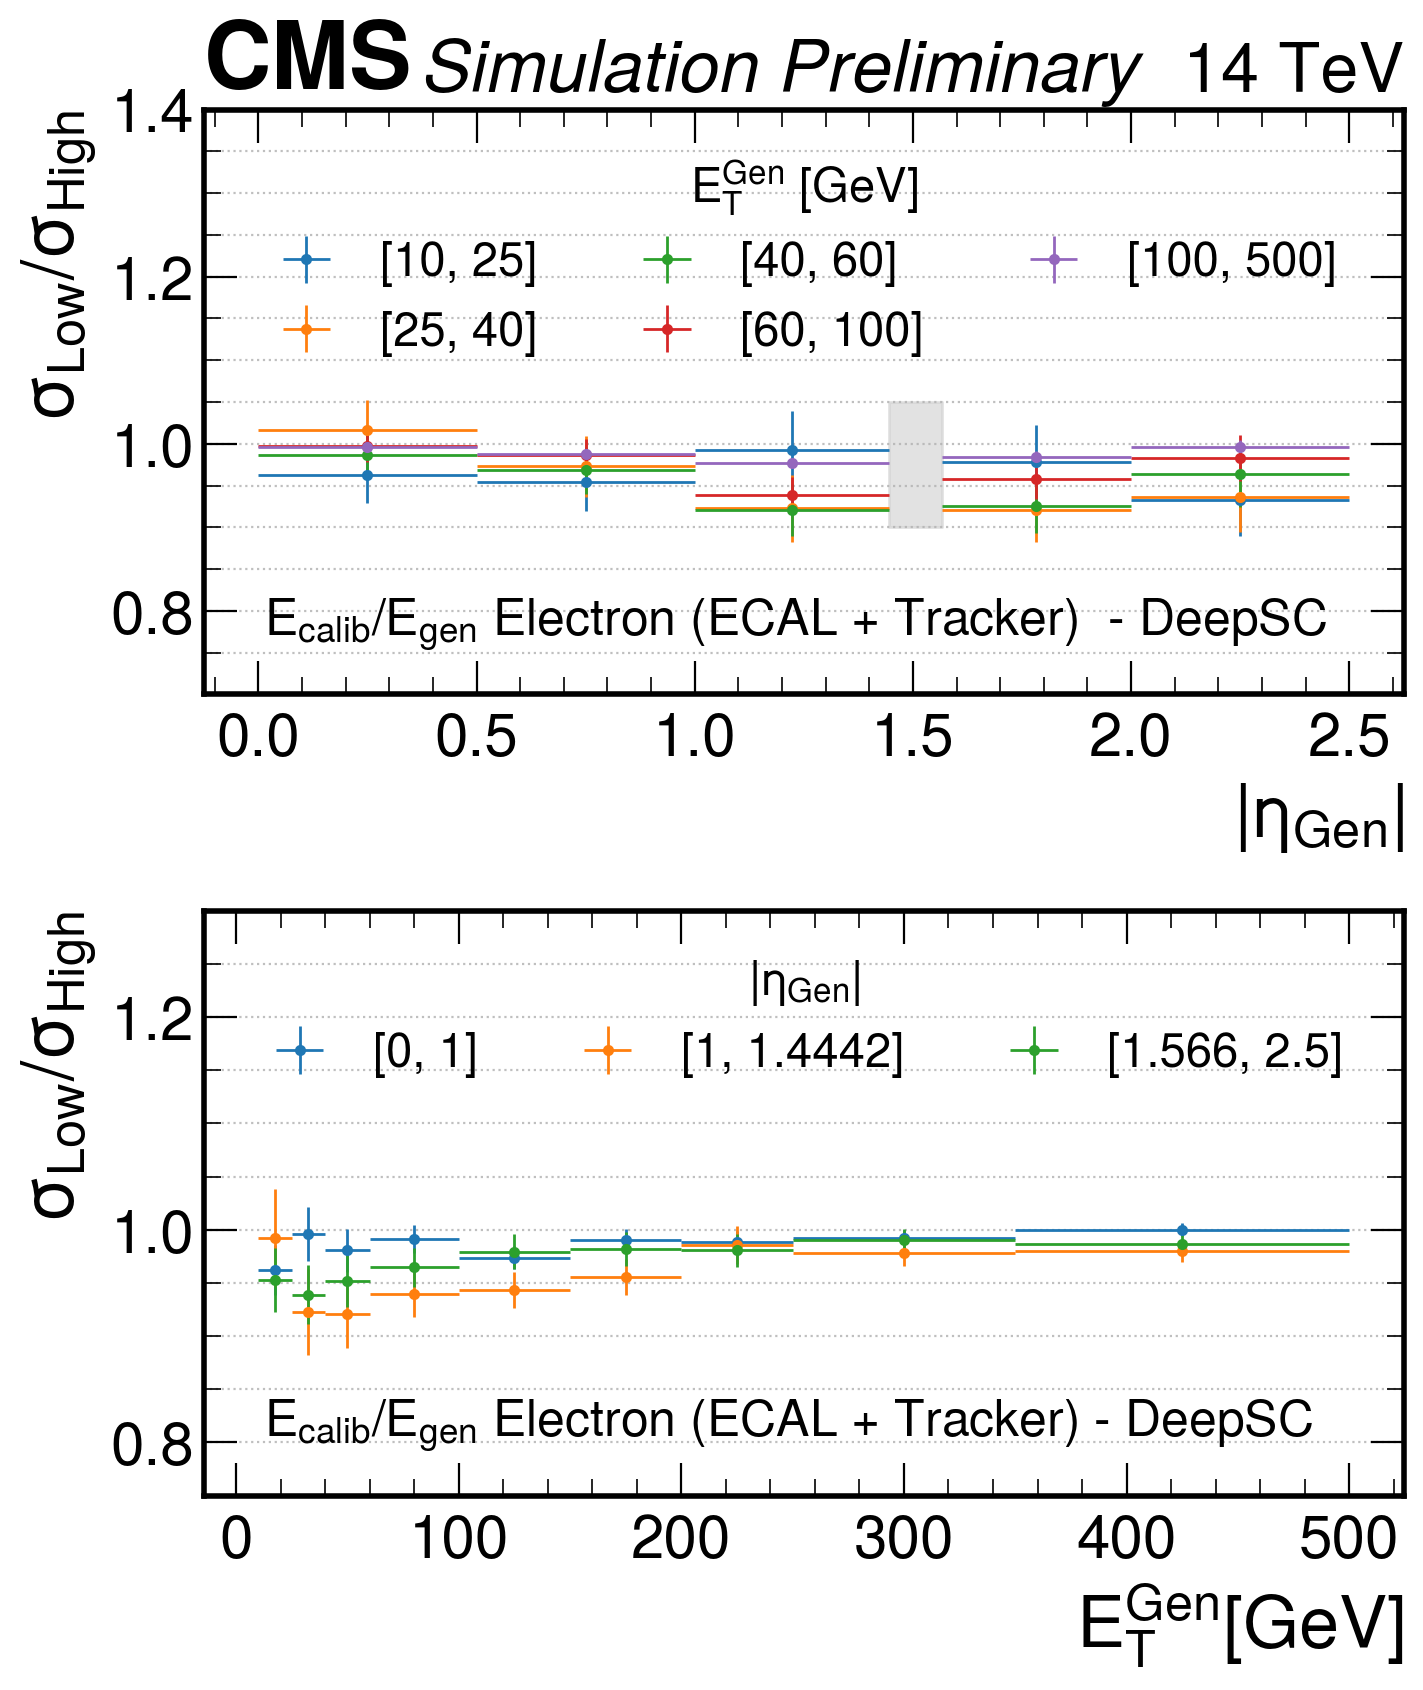

In [146]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)  - DeepSC",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - DeepSC",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_threshols_comparison", output=output_folder+"/electrons")

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


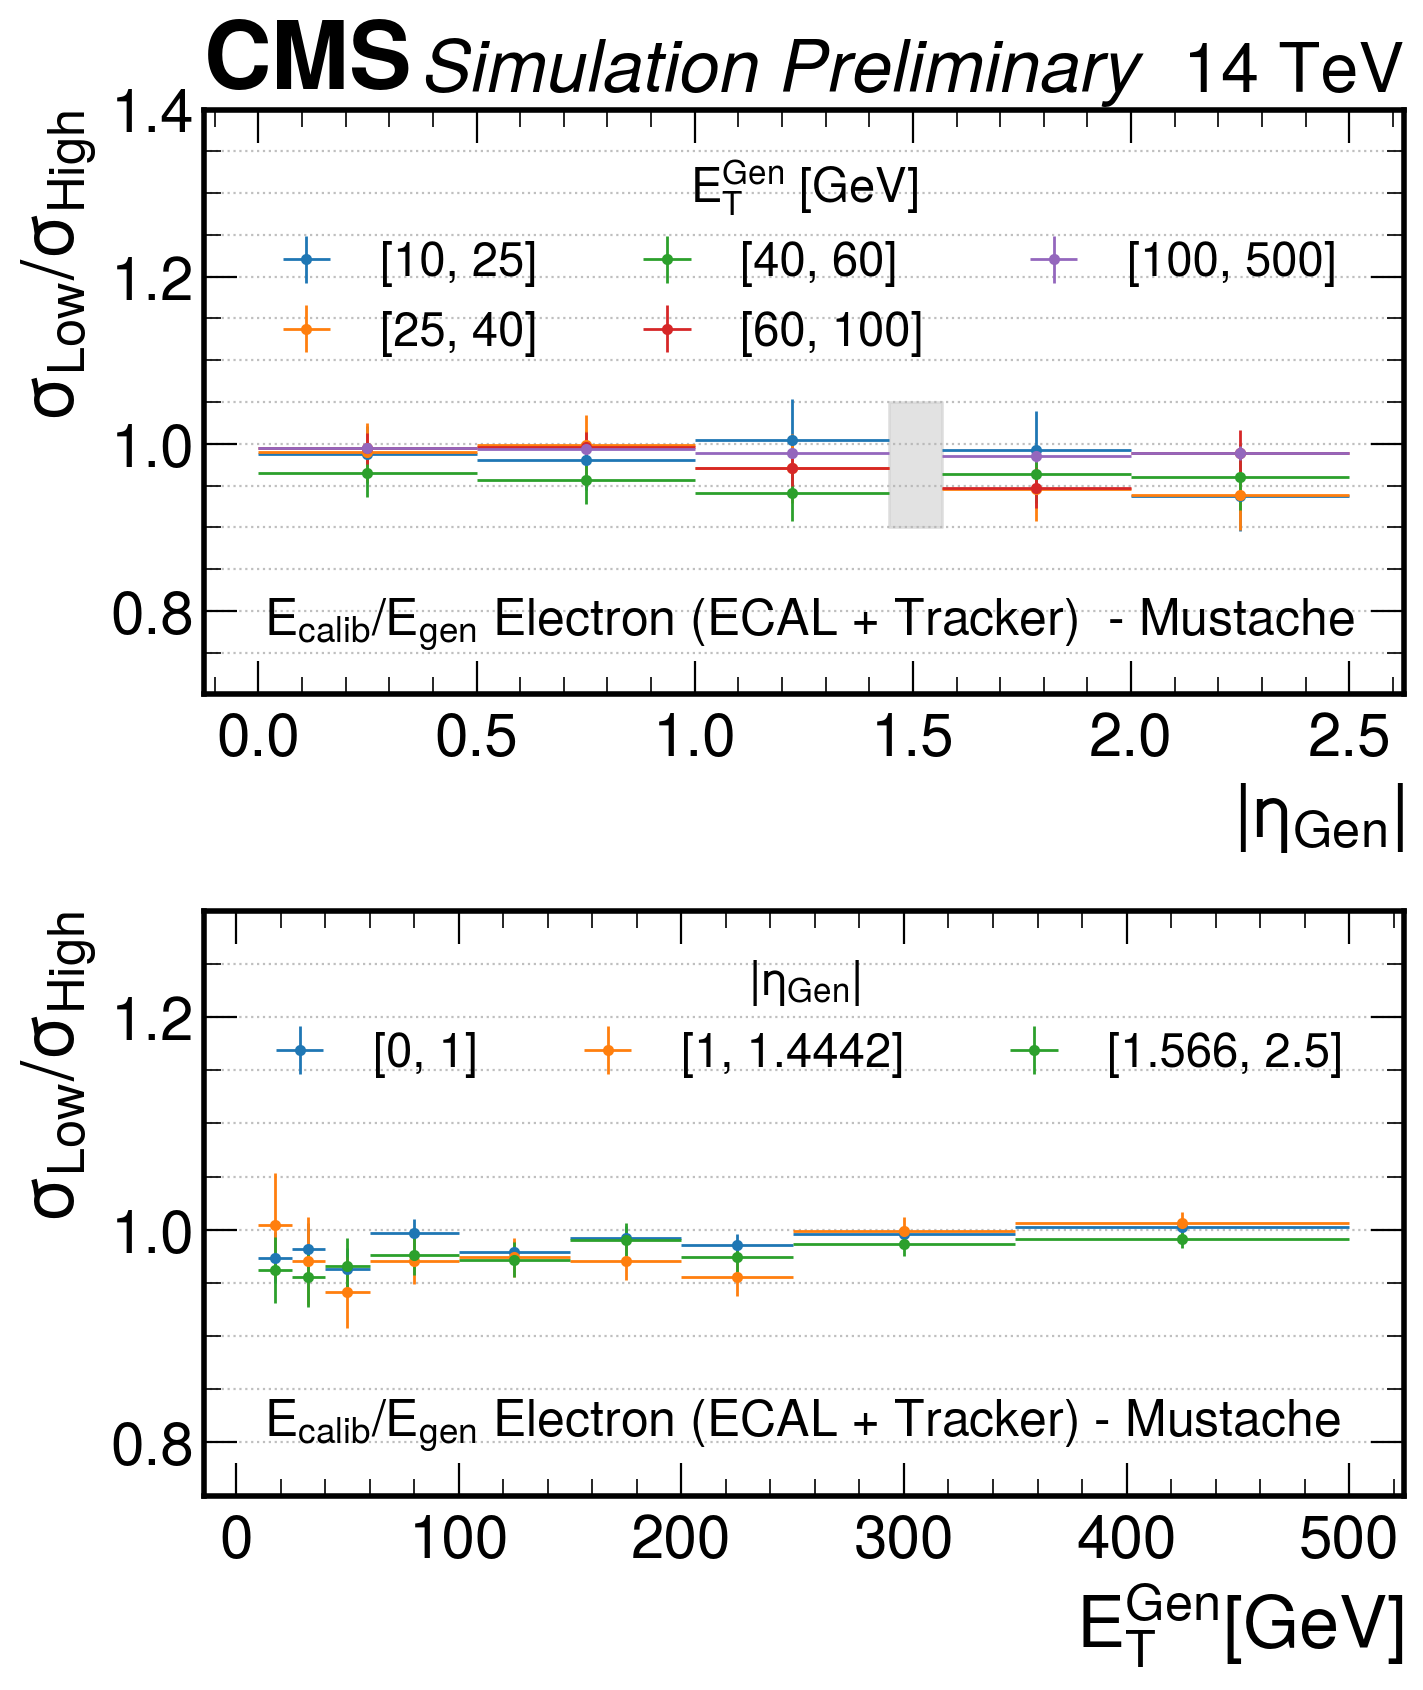

In [147]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)  - Mustache",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - Mustache",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="Mustache_threshols_comparison", output=output_folder+"/electrons")

## Cross comparison

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


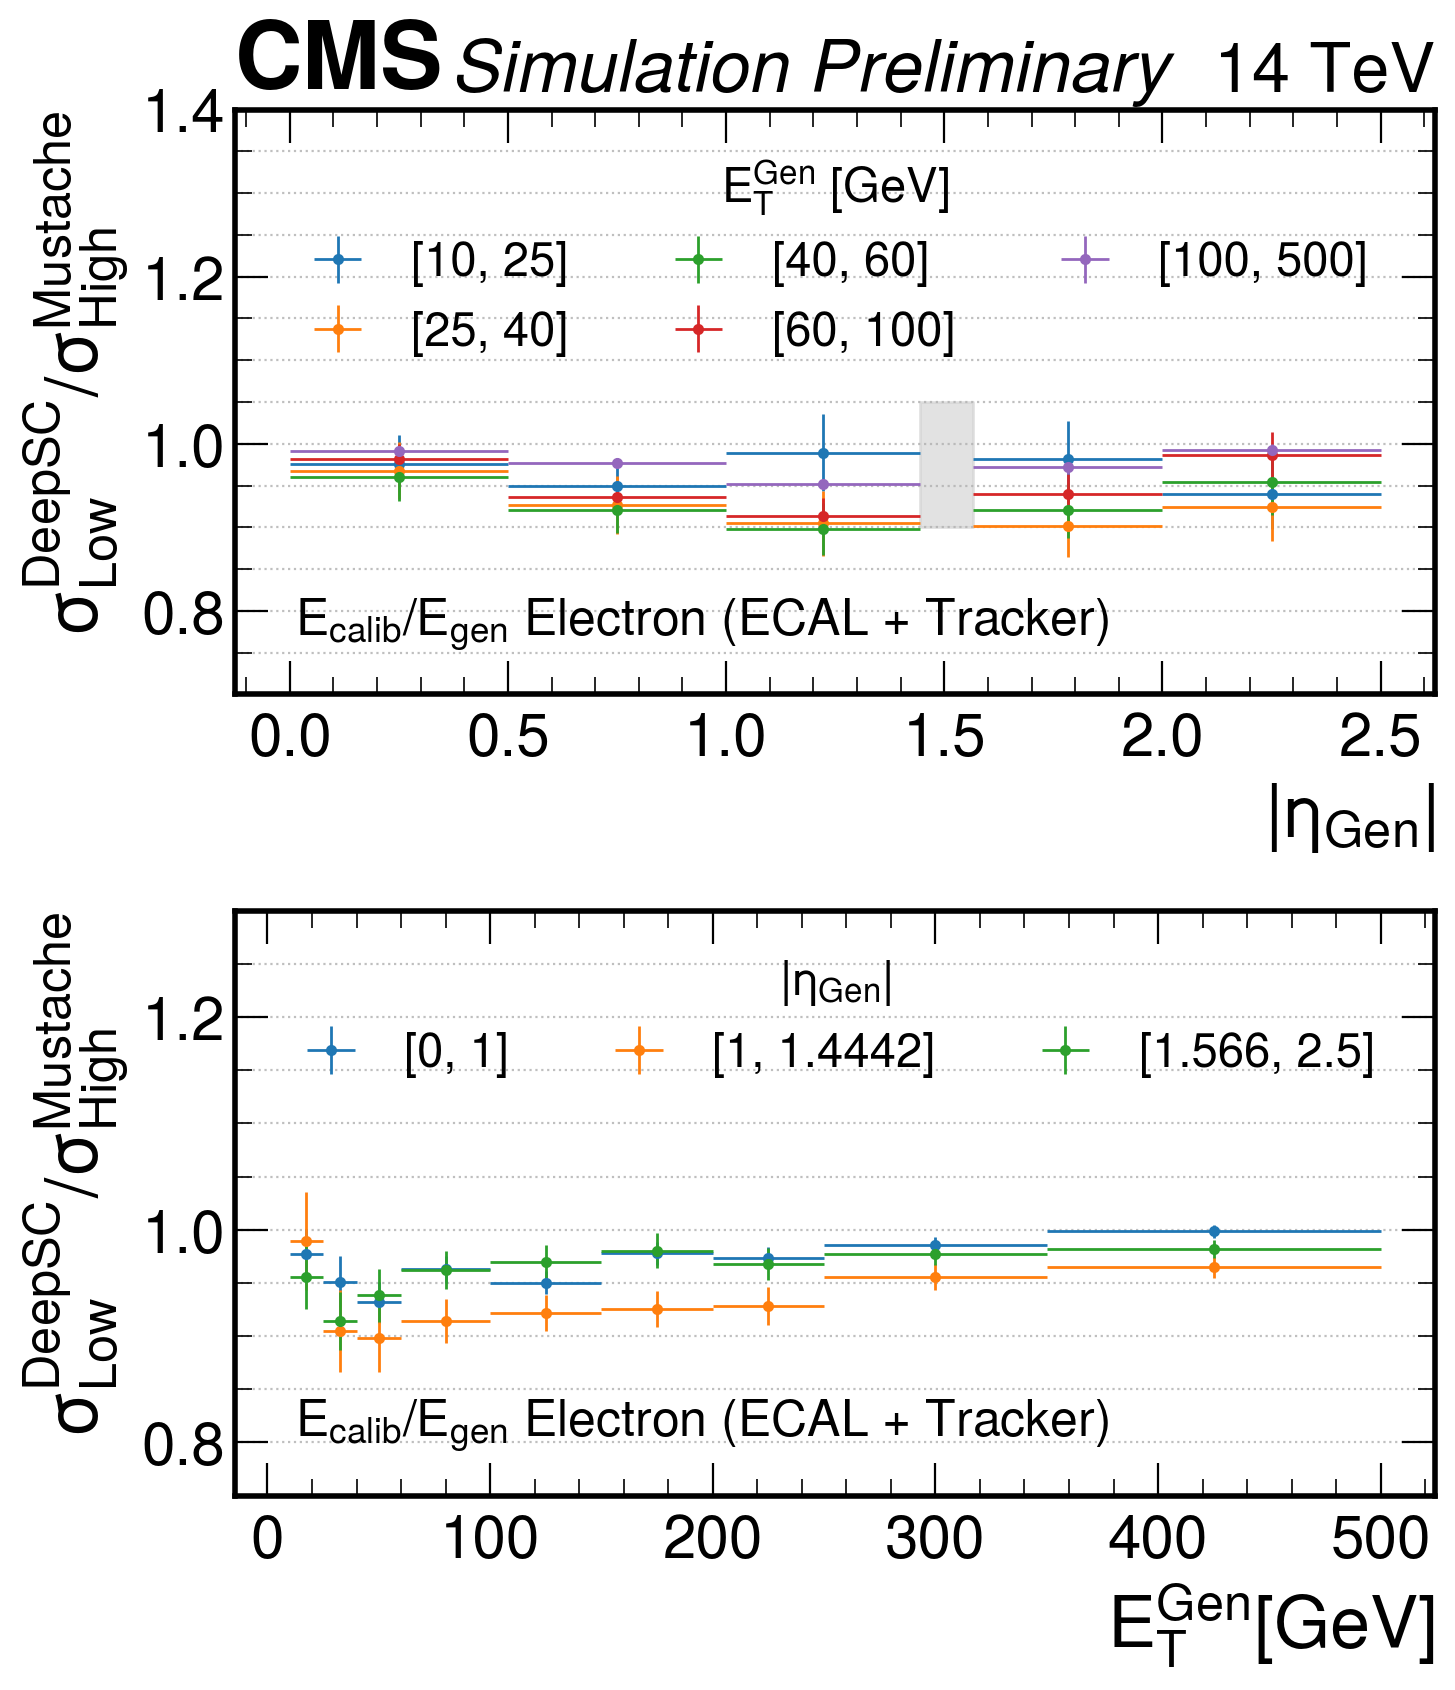

In [148]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{DeepSC}/\sigma_{High}^{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^{DeepSC}/\sigma_{High}^{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_comparison", output=output_folder+"/electrons")

## Final comparison

/tmp/ipykernel_22142/1327182628.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


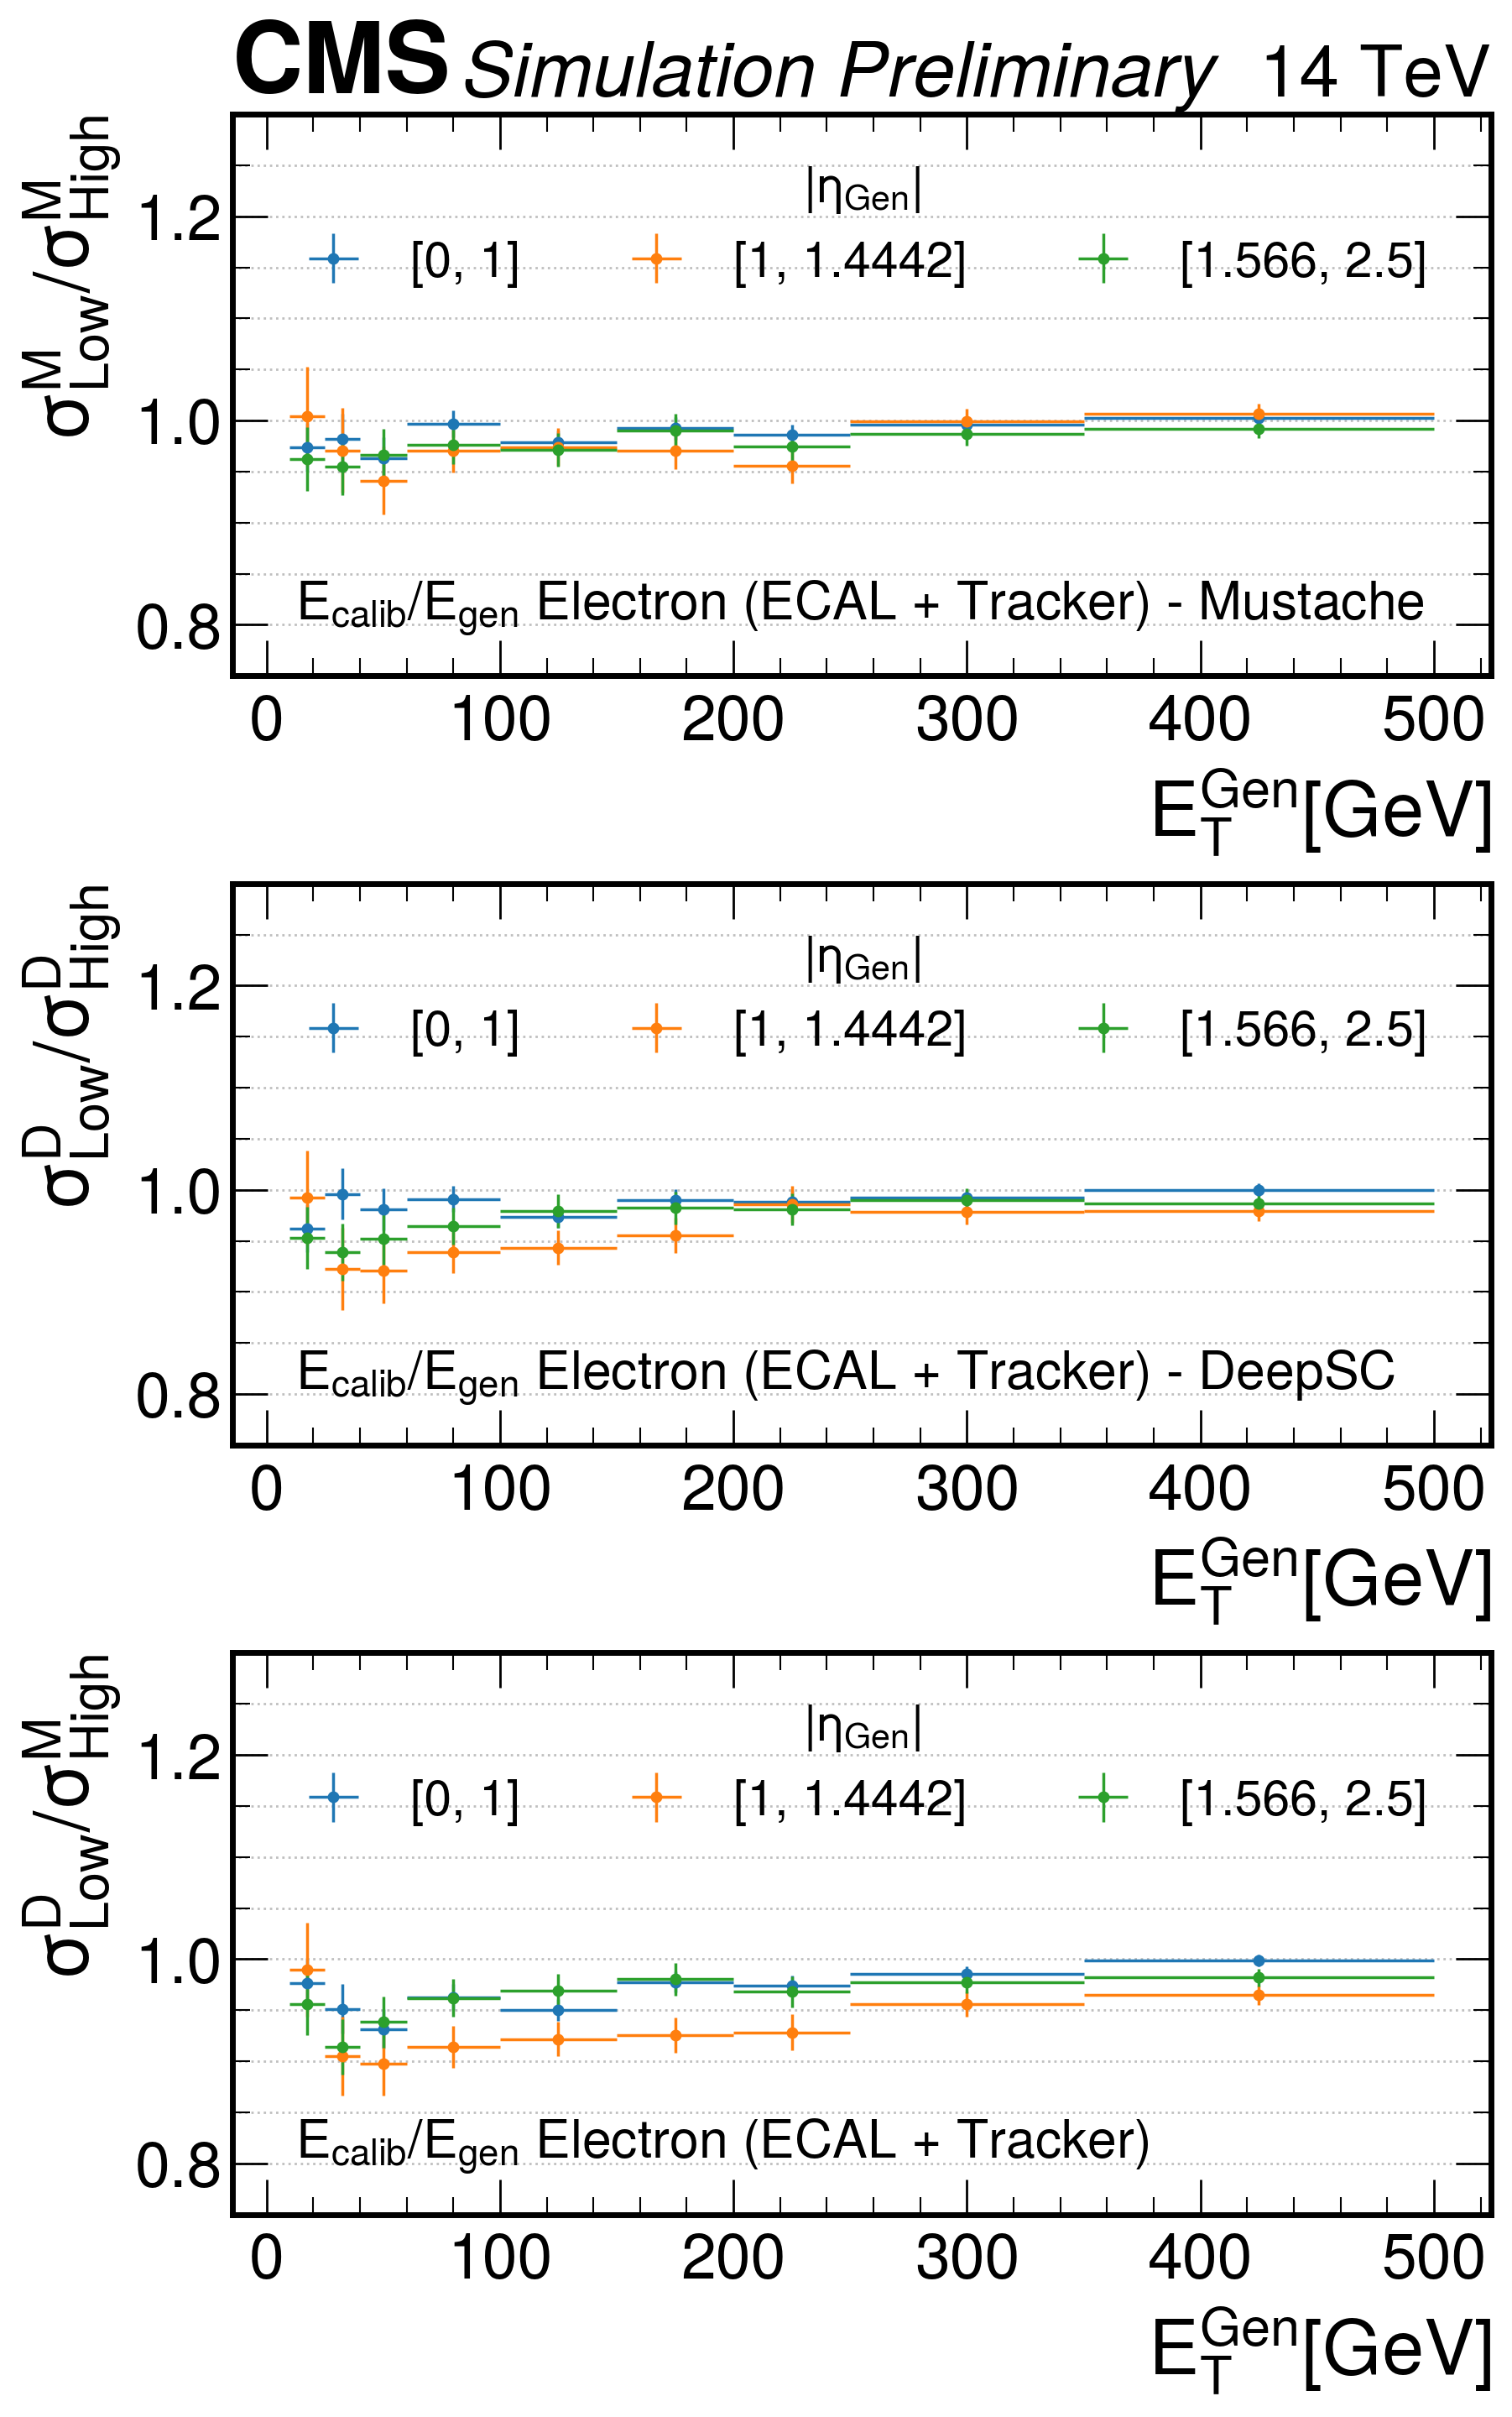

In [162]:

panels_res = [
   {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - Mustache",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^M/\sigma_{High}^M$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    

    
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker) - DeepSC",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^D/\sigma_{High}^D$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },  
    
    
    {
        "file1": input_folder_UL18+'/resolution_ele_gen_matched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_gen_matched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_total_comparison_Et", output=output_folder+"/electrons")

/tmp/ipykernel_22142/1327182628.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


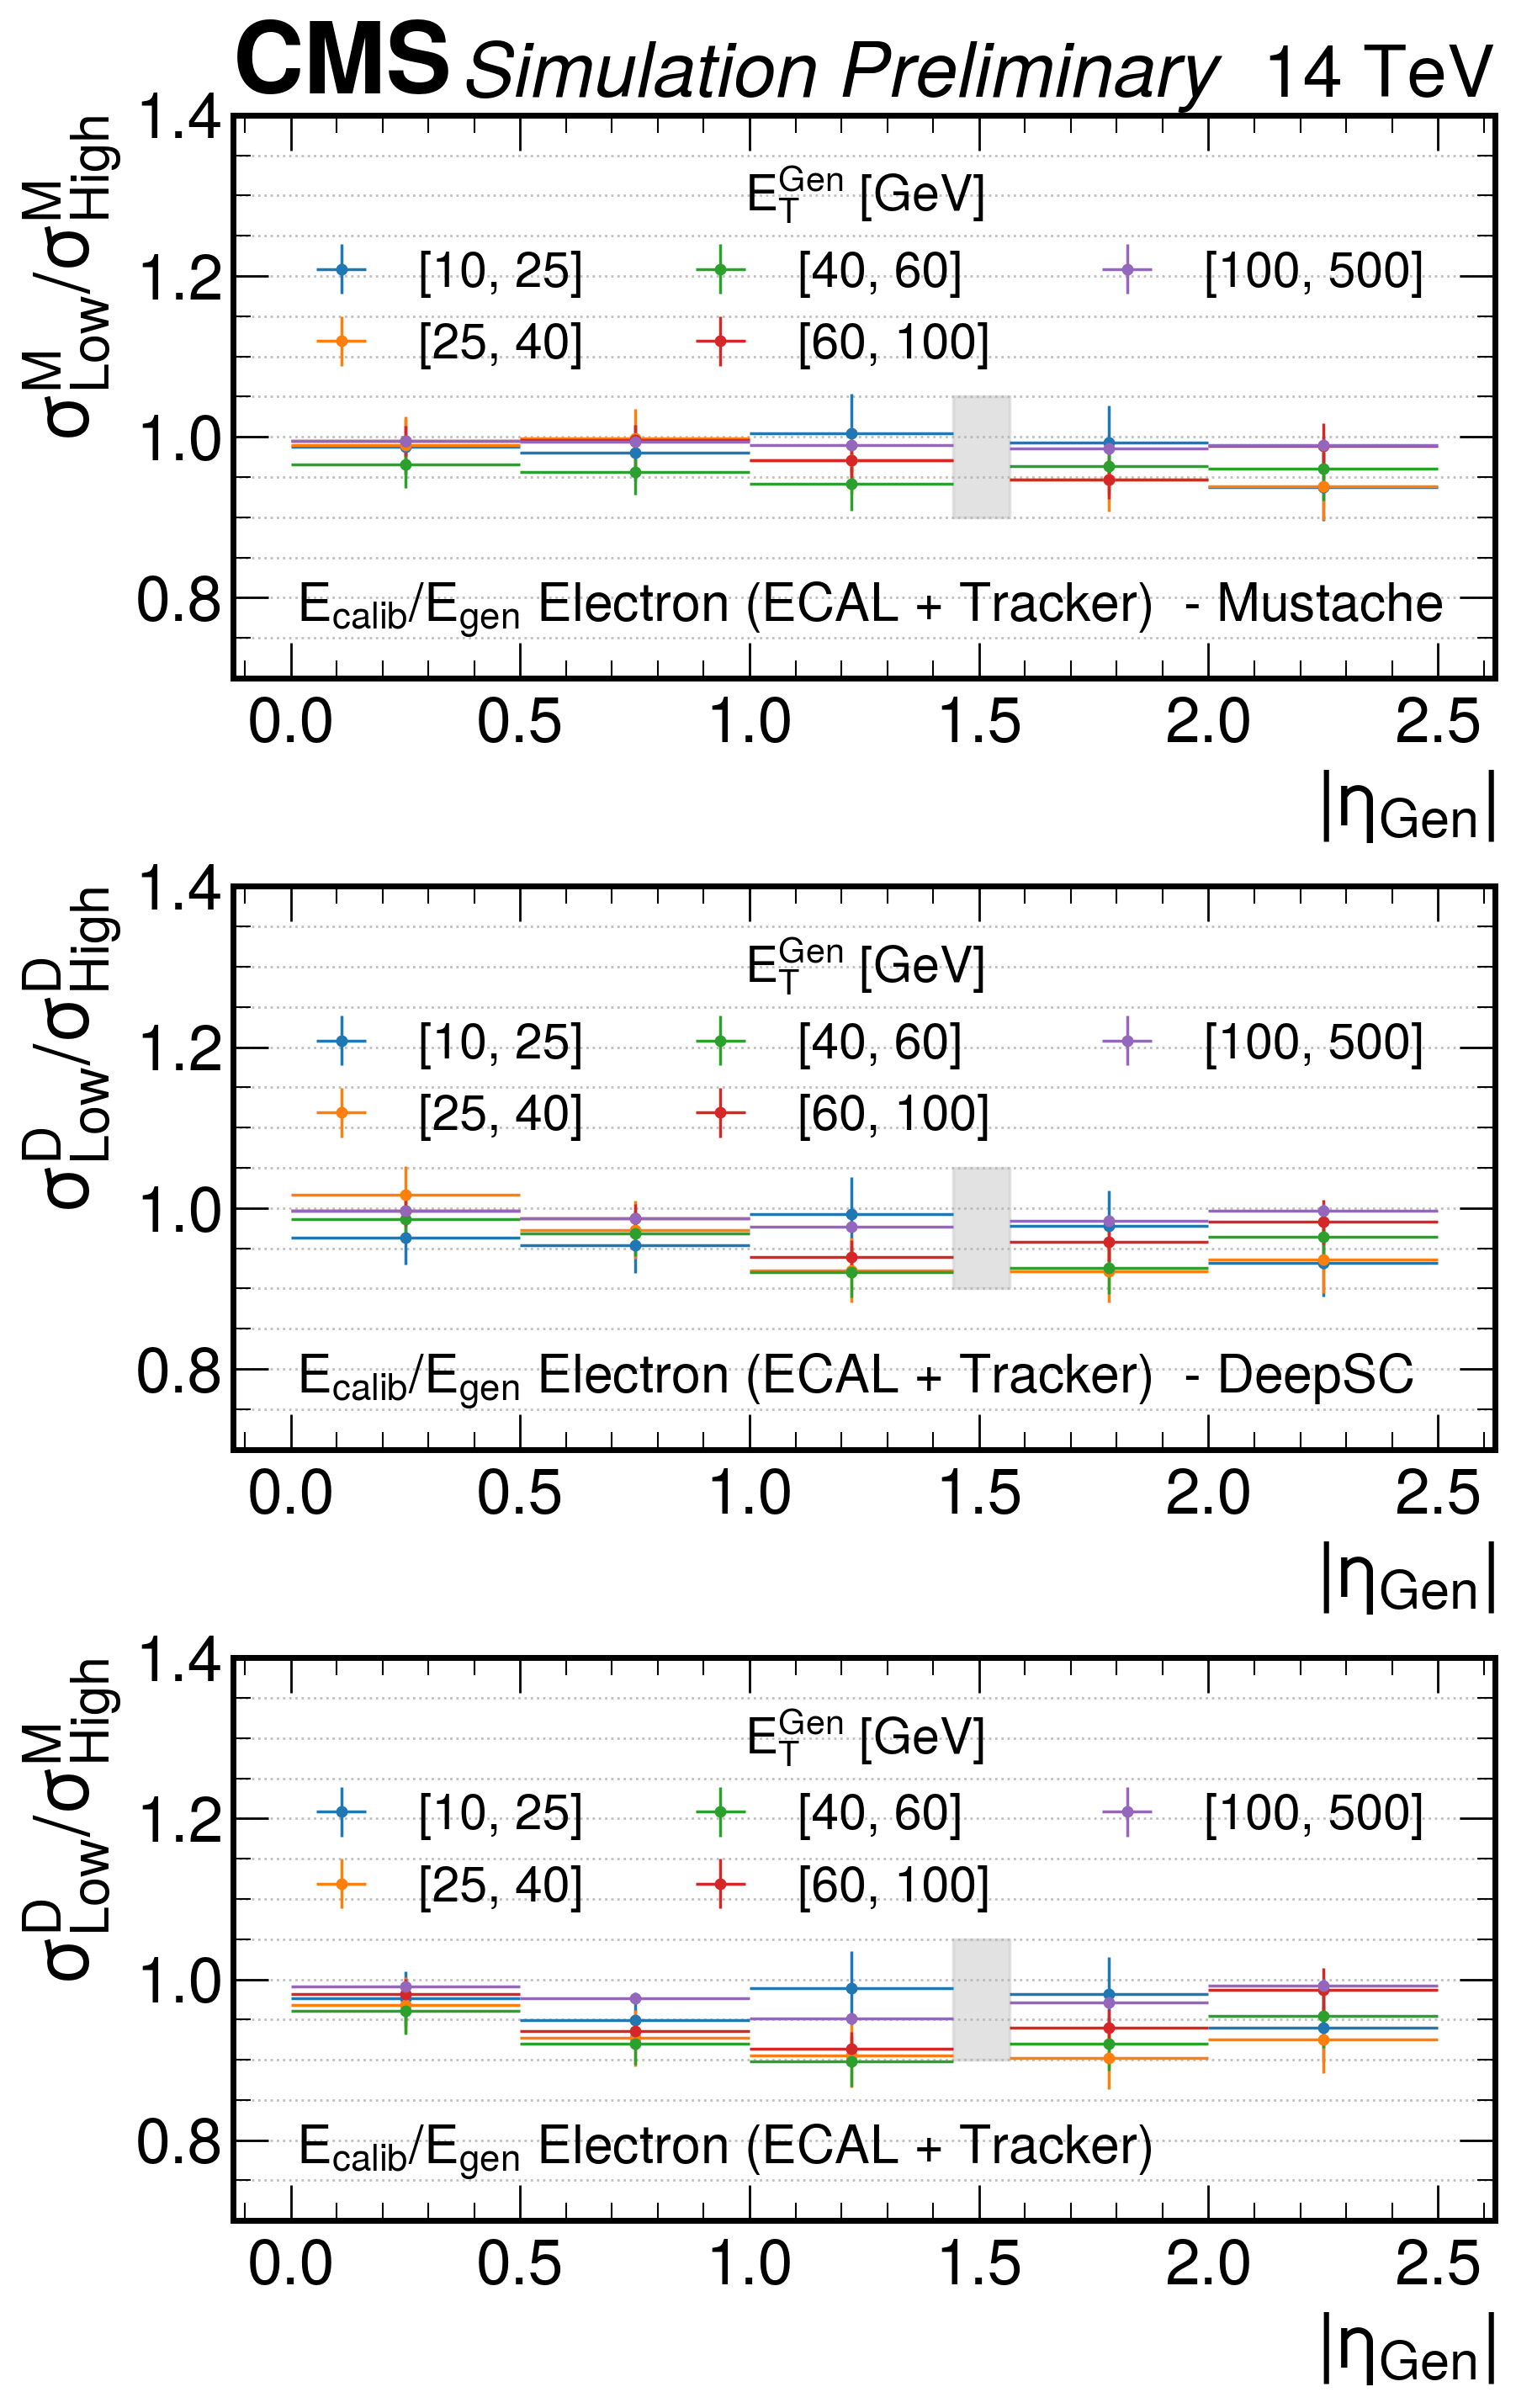

In [163]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)  - Mustache",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{M}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },   

     {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)  - DeepSC",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{D}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    
   {
        "file1": input_folder_UL18   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_gen_matched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL + Tracker)",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    }, 
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_total_comparison_Eta", output=output_folder+"/electrons")

# SuperCluster

## DeepSC vs Mustache - UL18

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


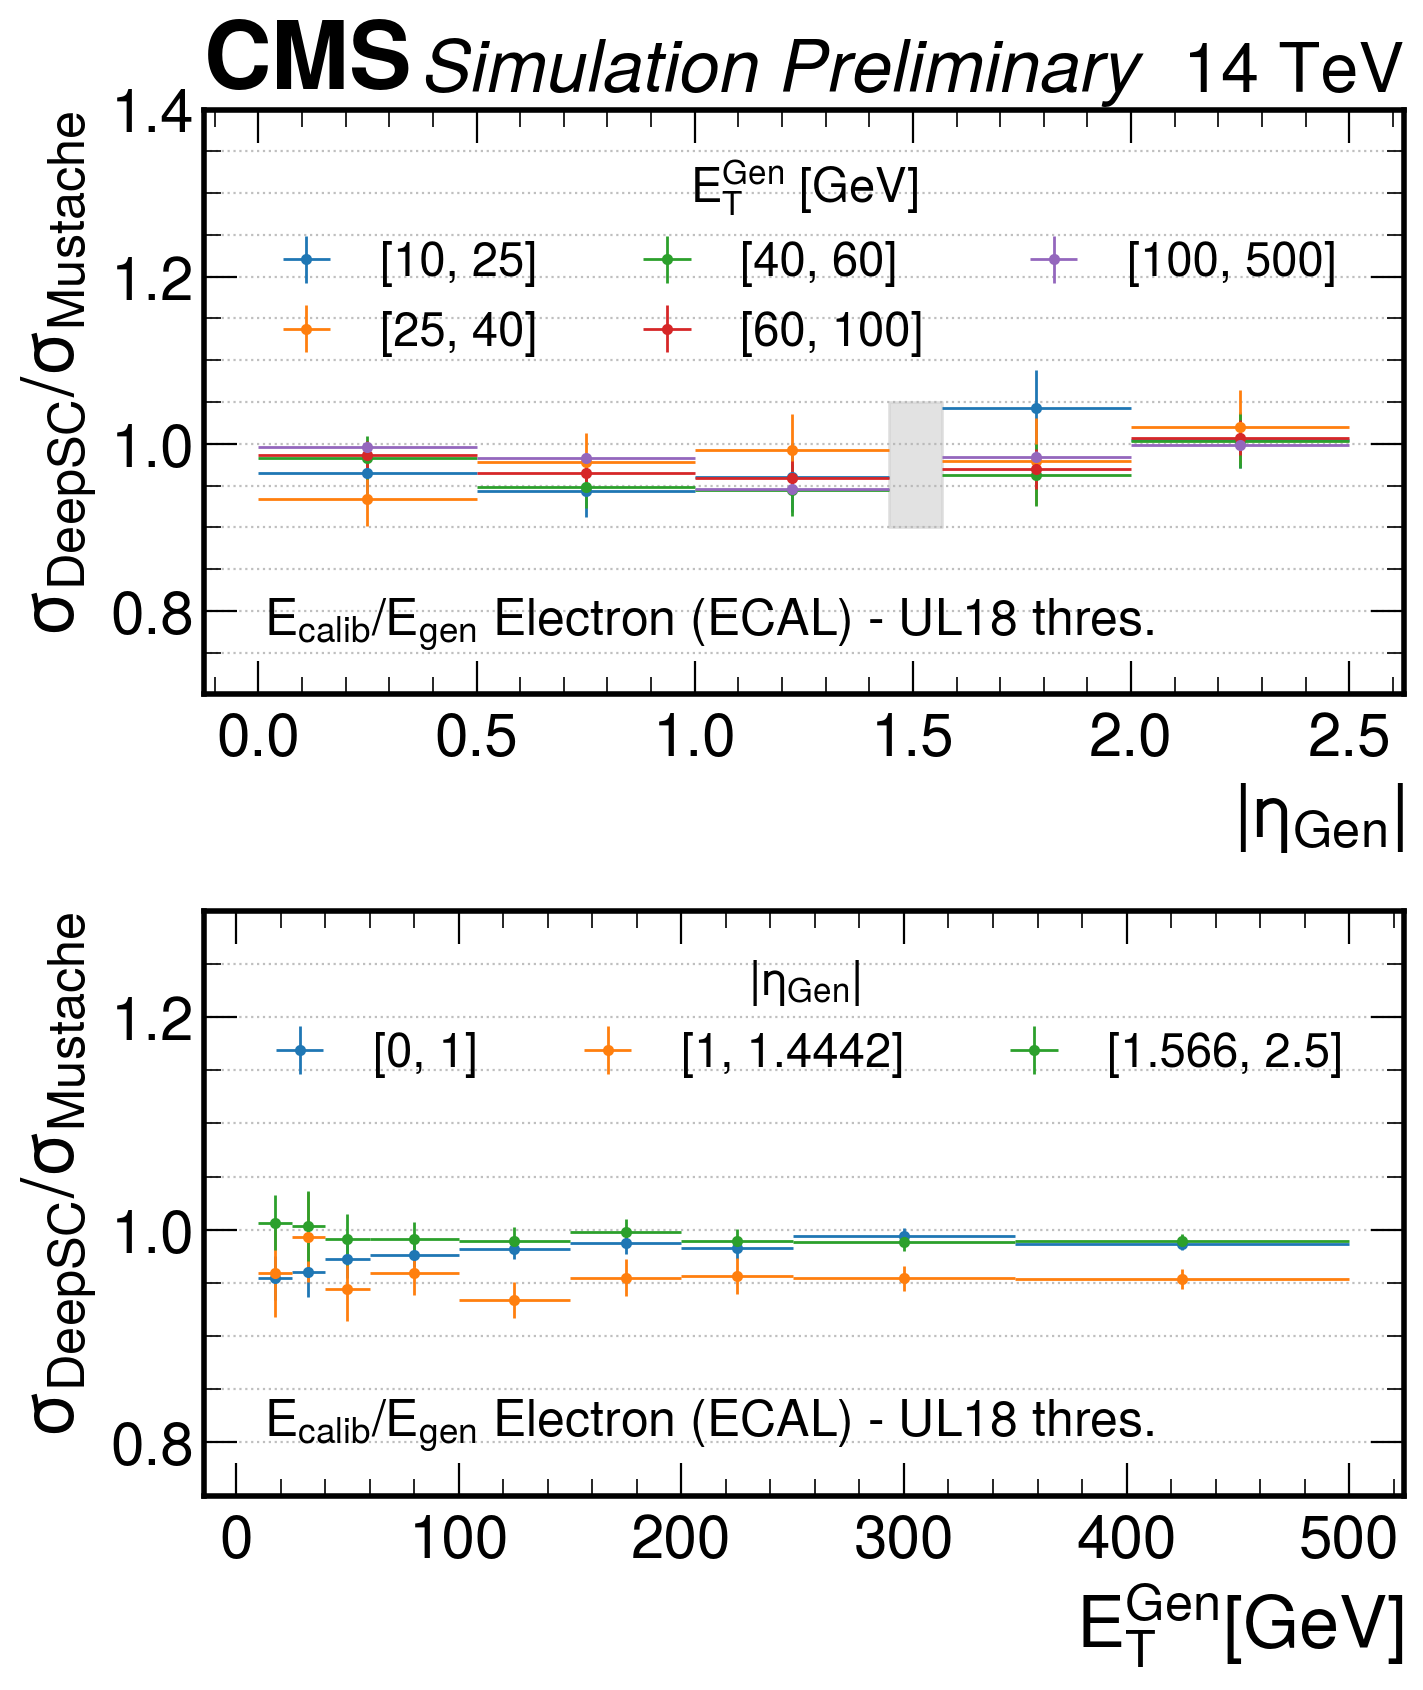

In [150]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - UL18 thres.",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - UL18 thres.",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$",
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_vs_mustache_threshols_UL18_superCluster", output=output_folder+"/superclusters")

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


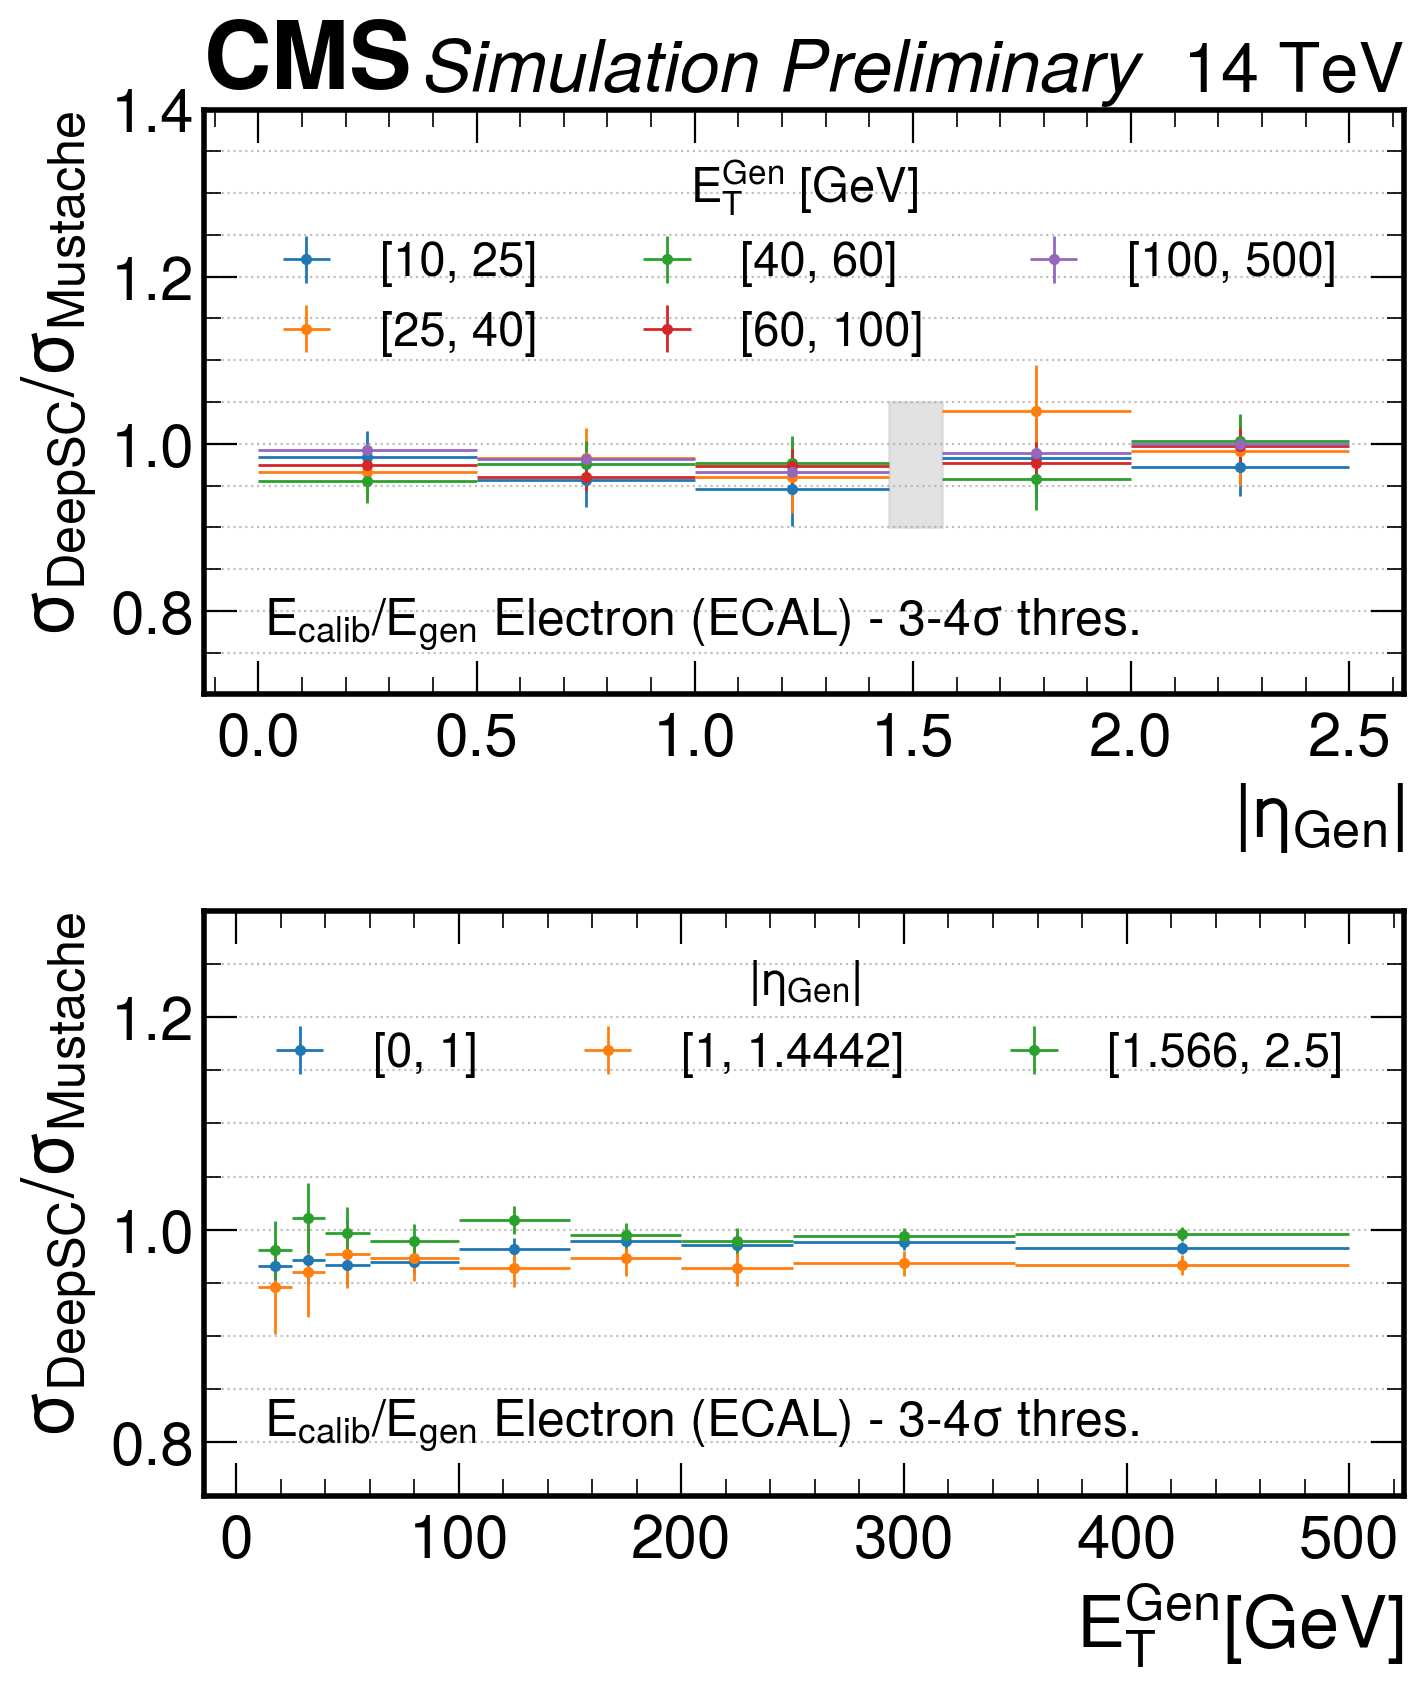

In [151]:
panels_res = [
    {
        "file1": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - 3-4$\sigma$ thres.",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - 3-4$\sigma$ thres.",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{DeepSC}/\sigma_{Mustache}$",
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_vs_mustache_threshols_34sigma_supercluster", output=output_folder+"/superclusters")

## Comparison algo vs different thresholds

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


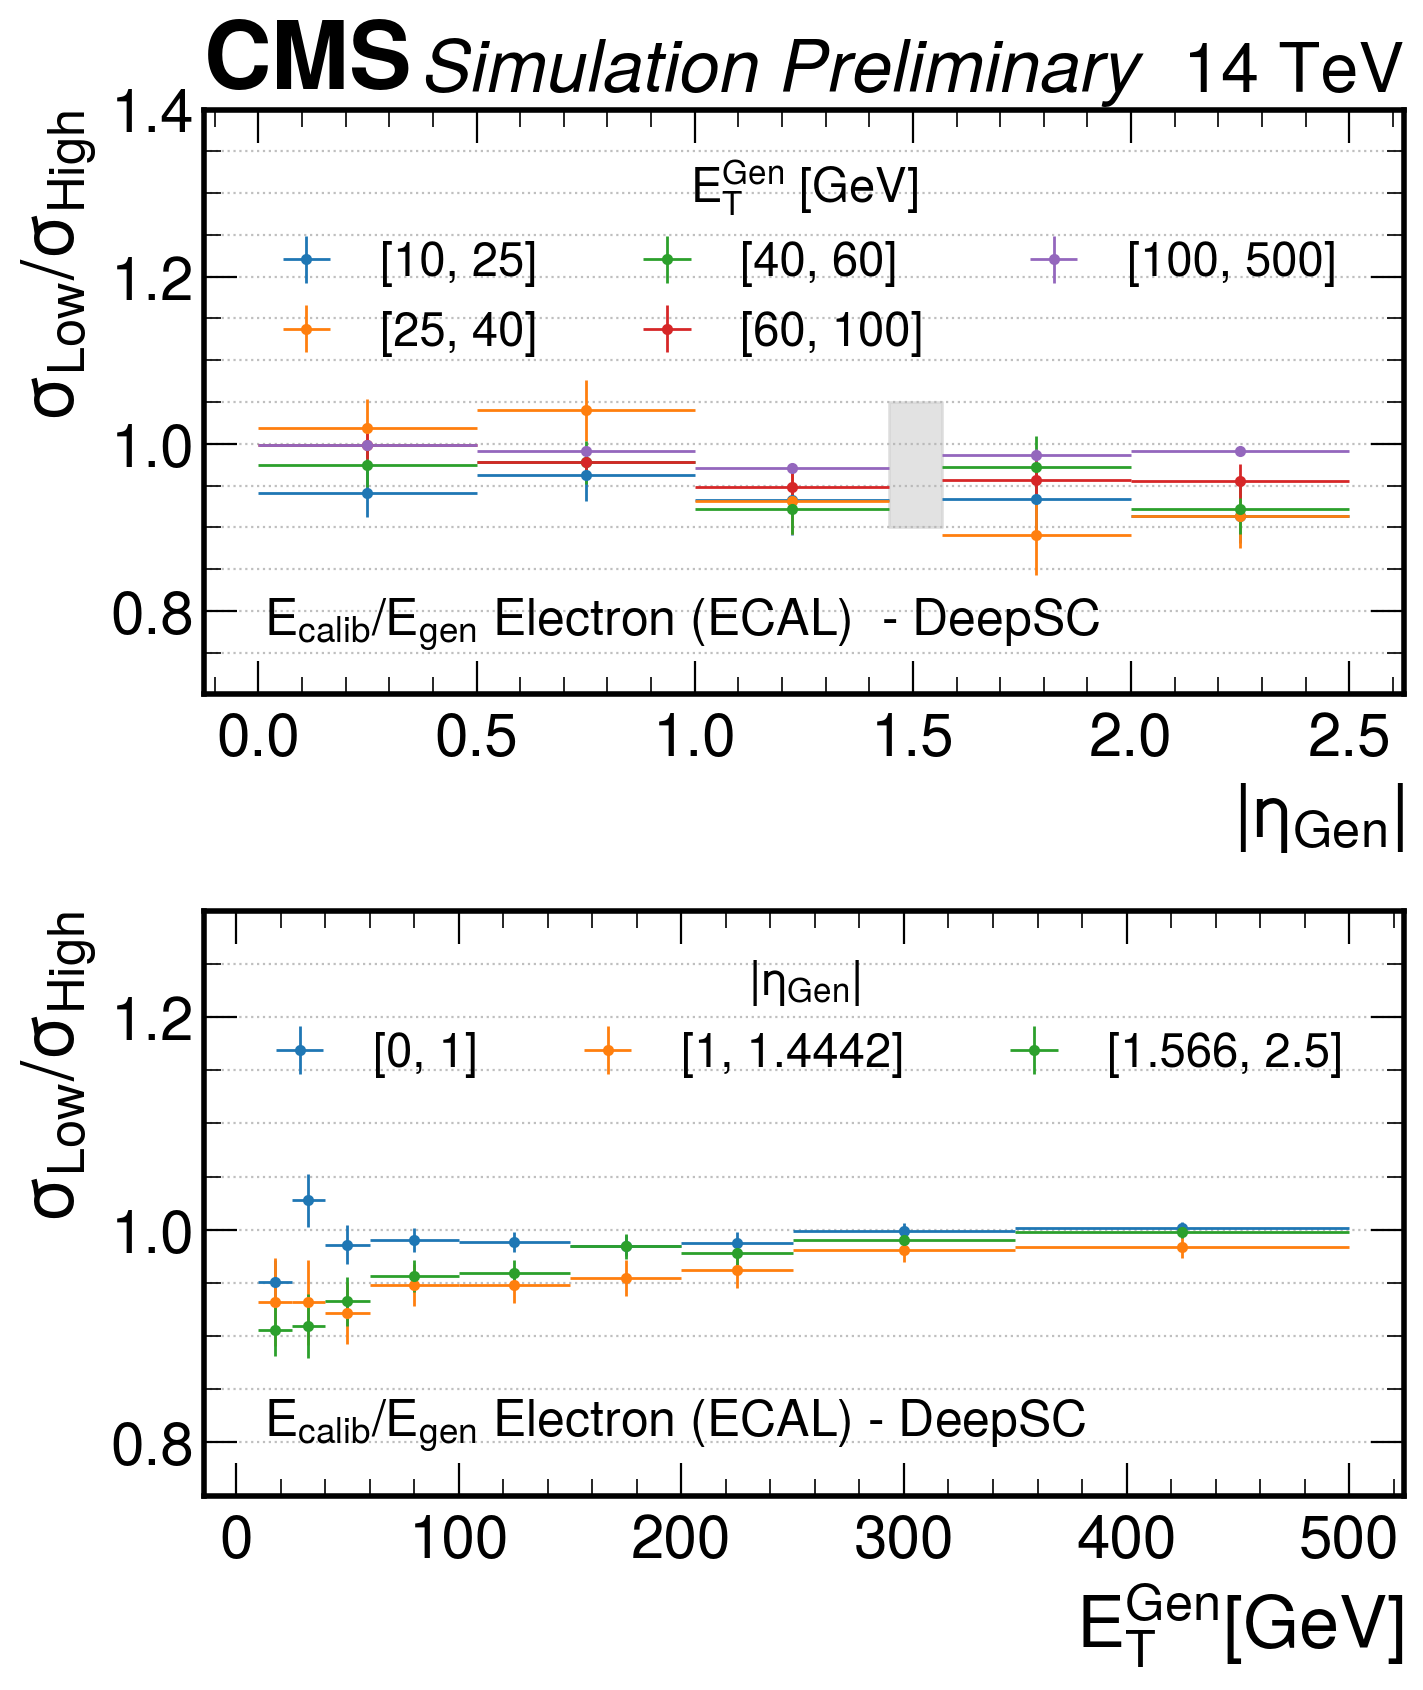

In [152]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)  - DeepSC",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - DeepSC",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="deepSC_threshols_comparison_supercluster", output=output_folder+"/superclusters")

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


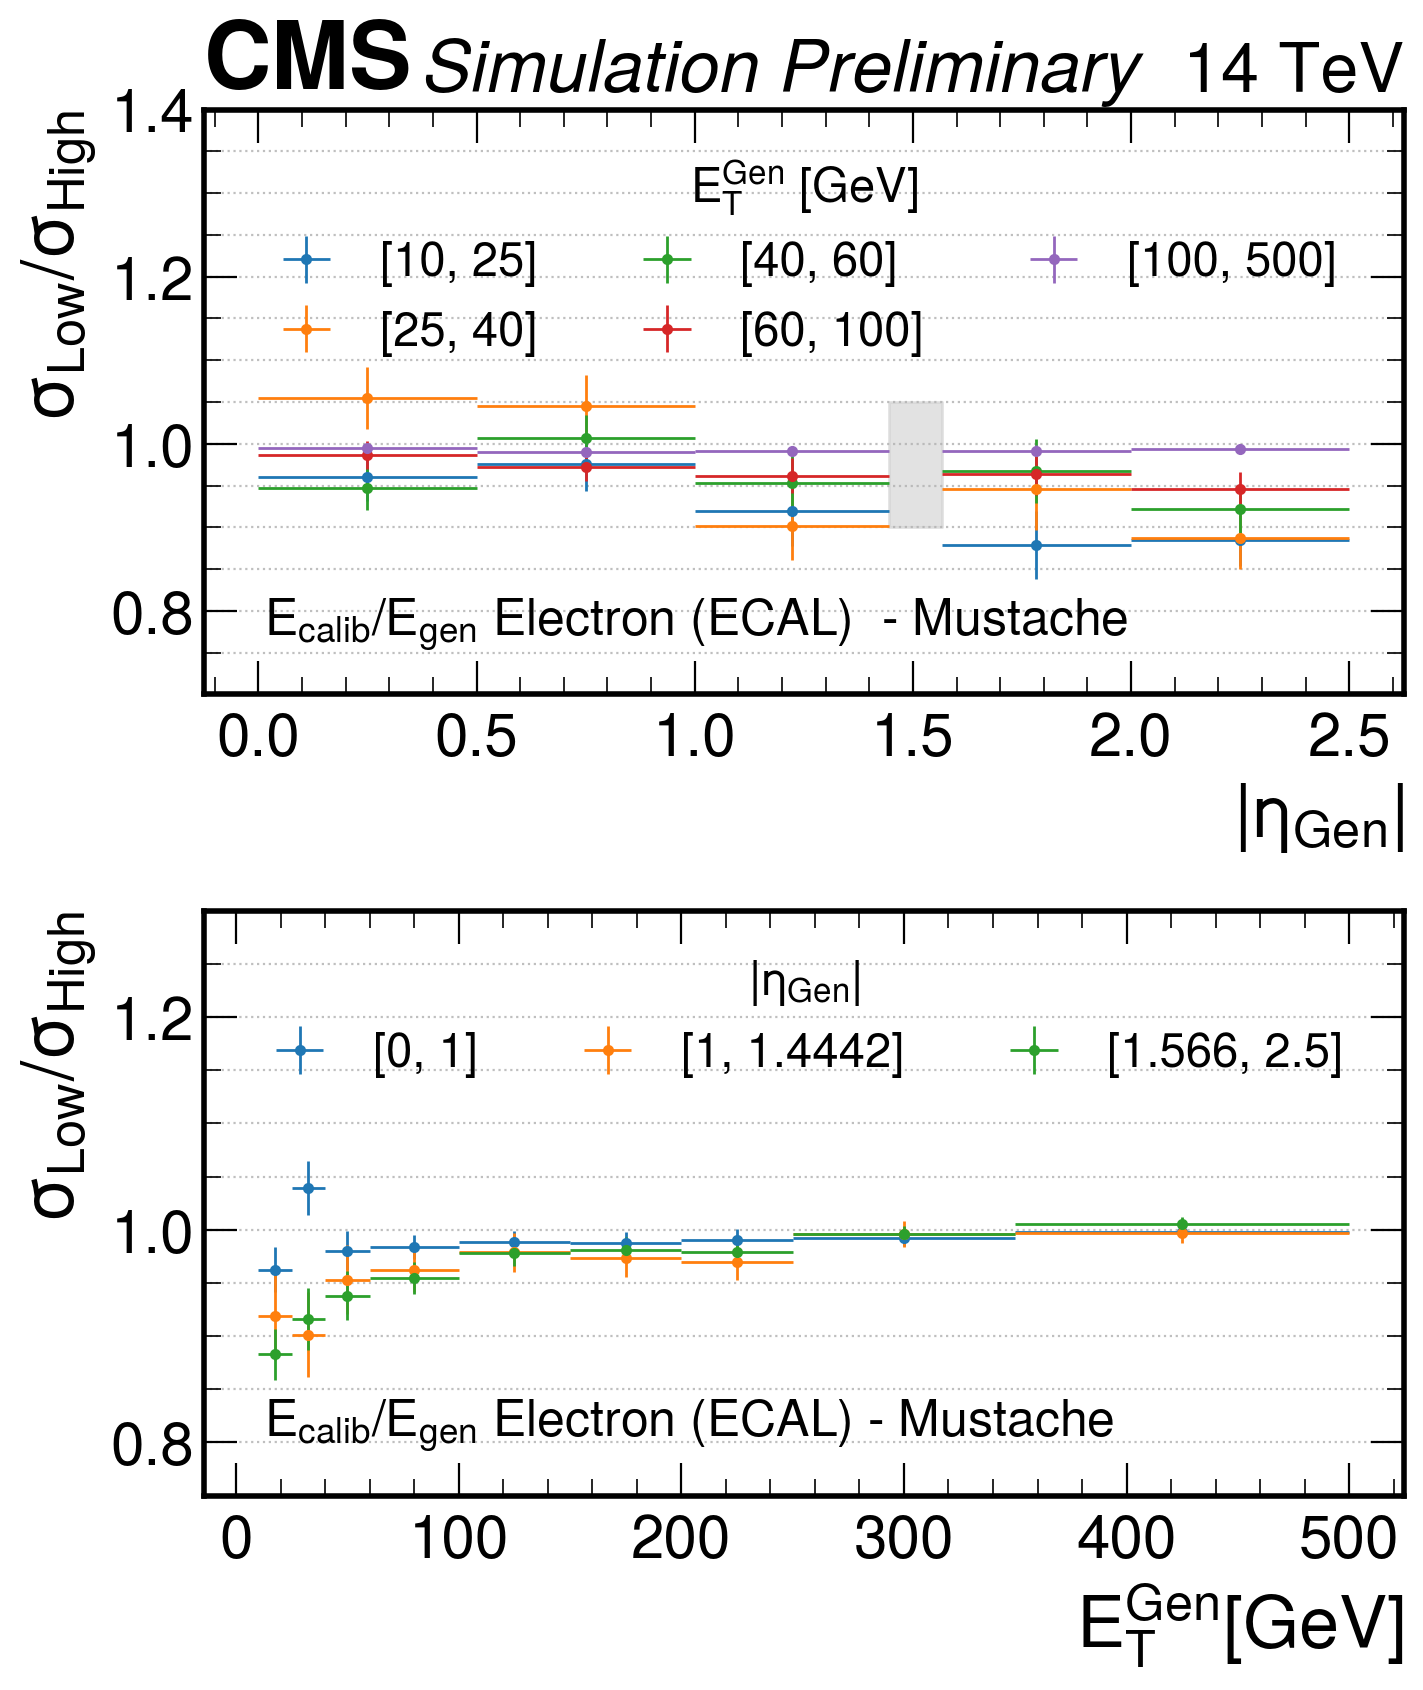

In [153]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)  - Mustache",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - Mustache",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}/\sigma_{High}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="Mustache_threshols_comparison_supercluster", output=output_folder+"/superclusters")

## Cross comparison

/tmp/ipykernel_22142/1532579675.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


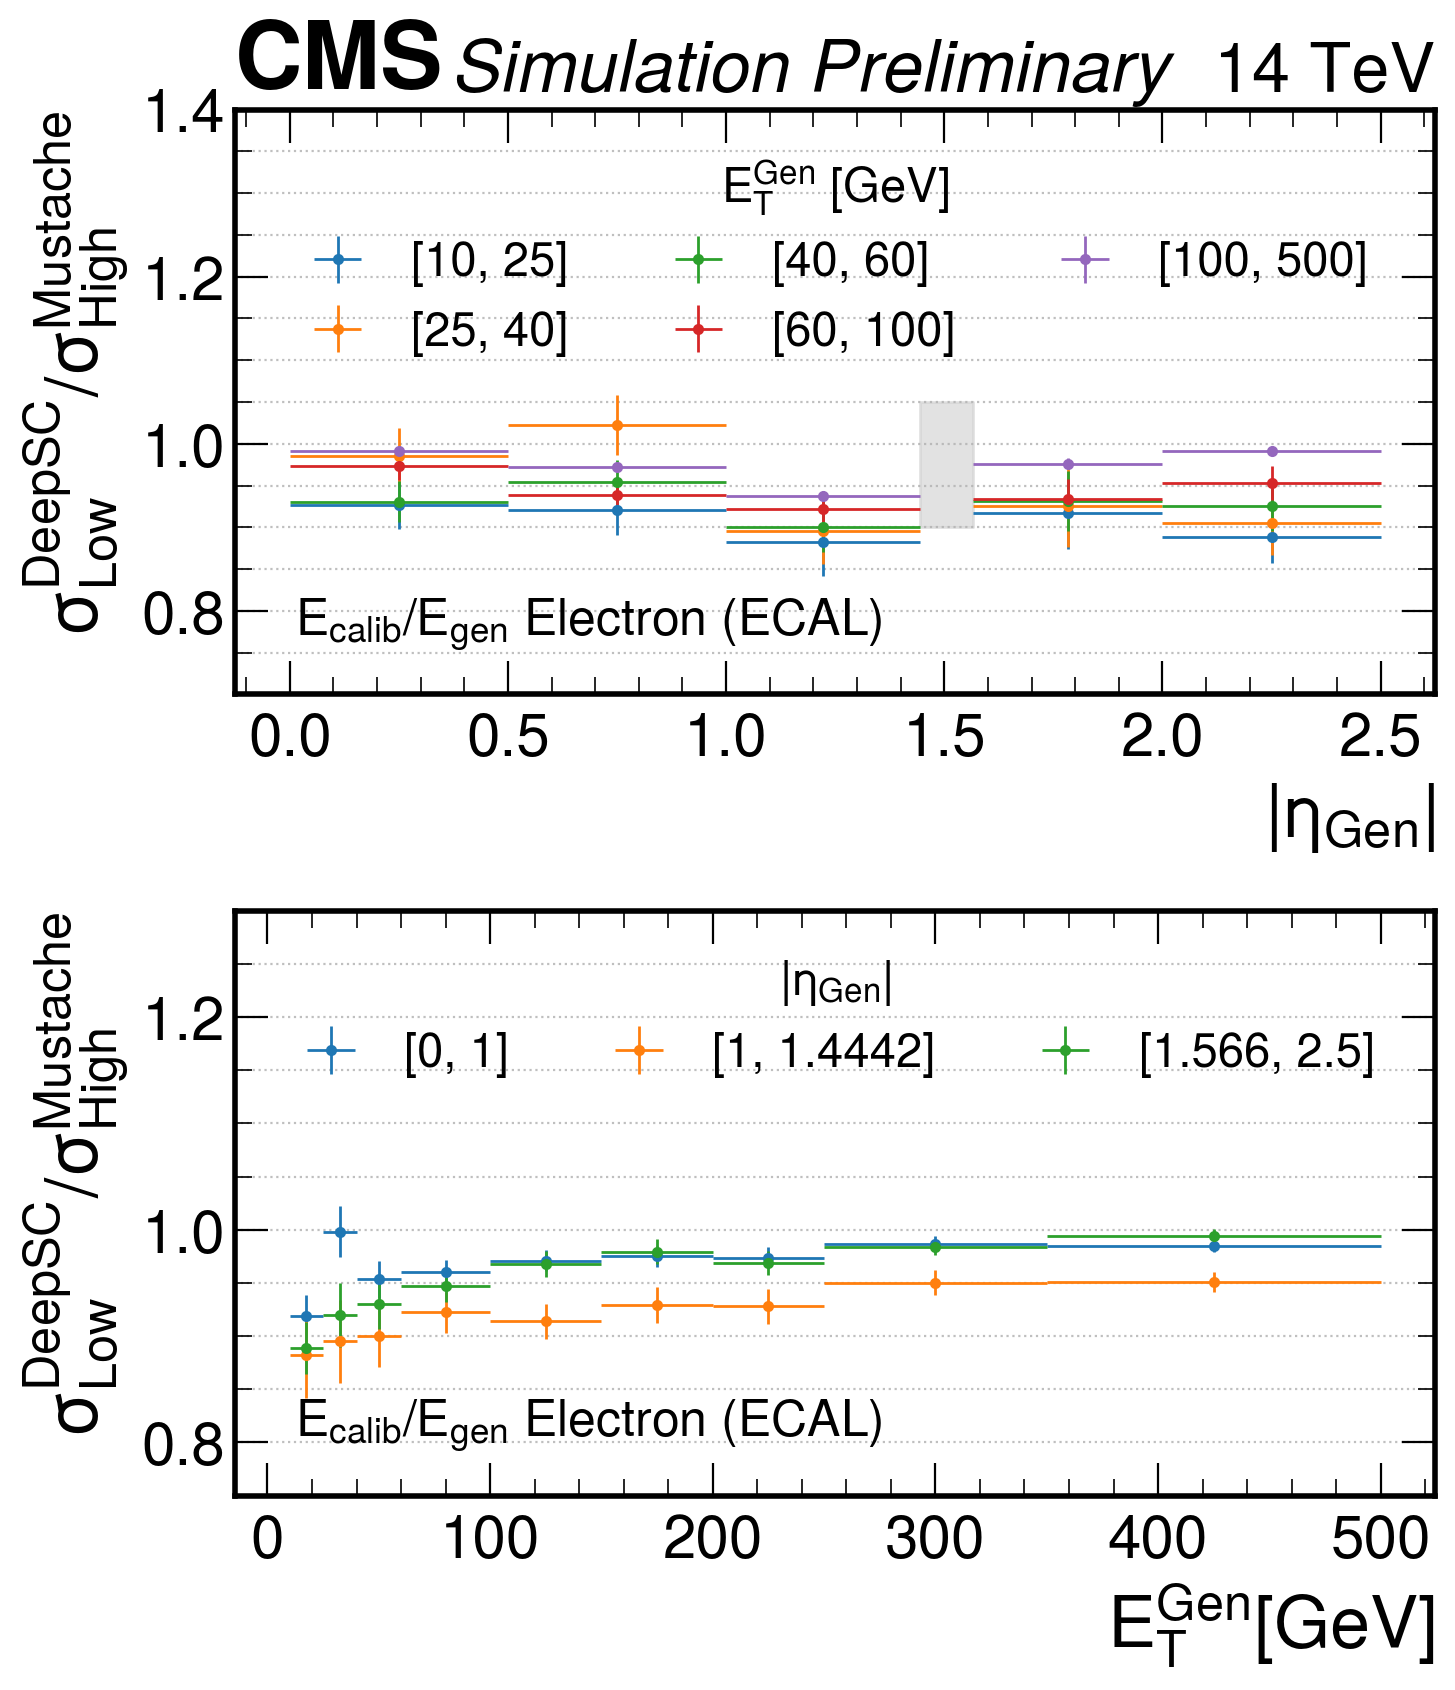

In [154]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{DeepSC}/\sigma_{High}^{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^{DeepSC}/\sigma_{High}^{Mustache}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_comparison_superclusters", output=output_folder+"/superclusters")

## Final comparison

/tmp/ipykernel_22142/1327182628.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


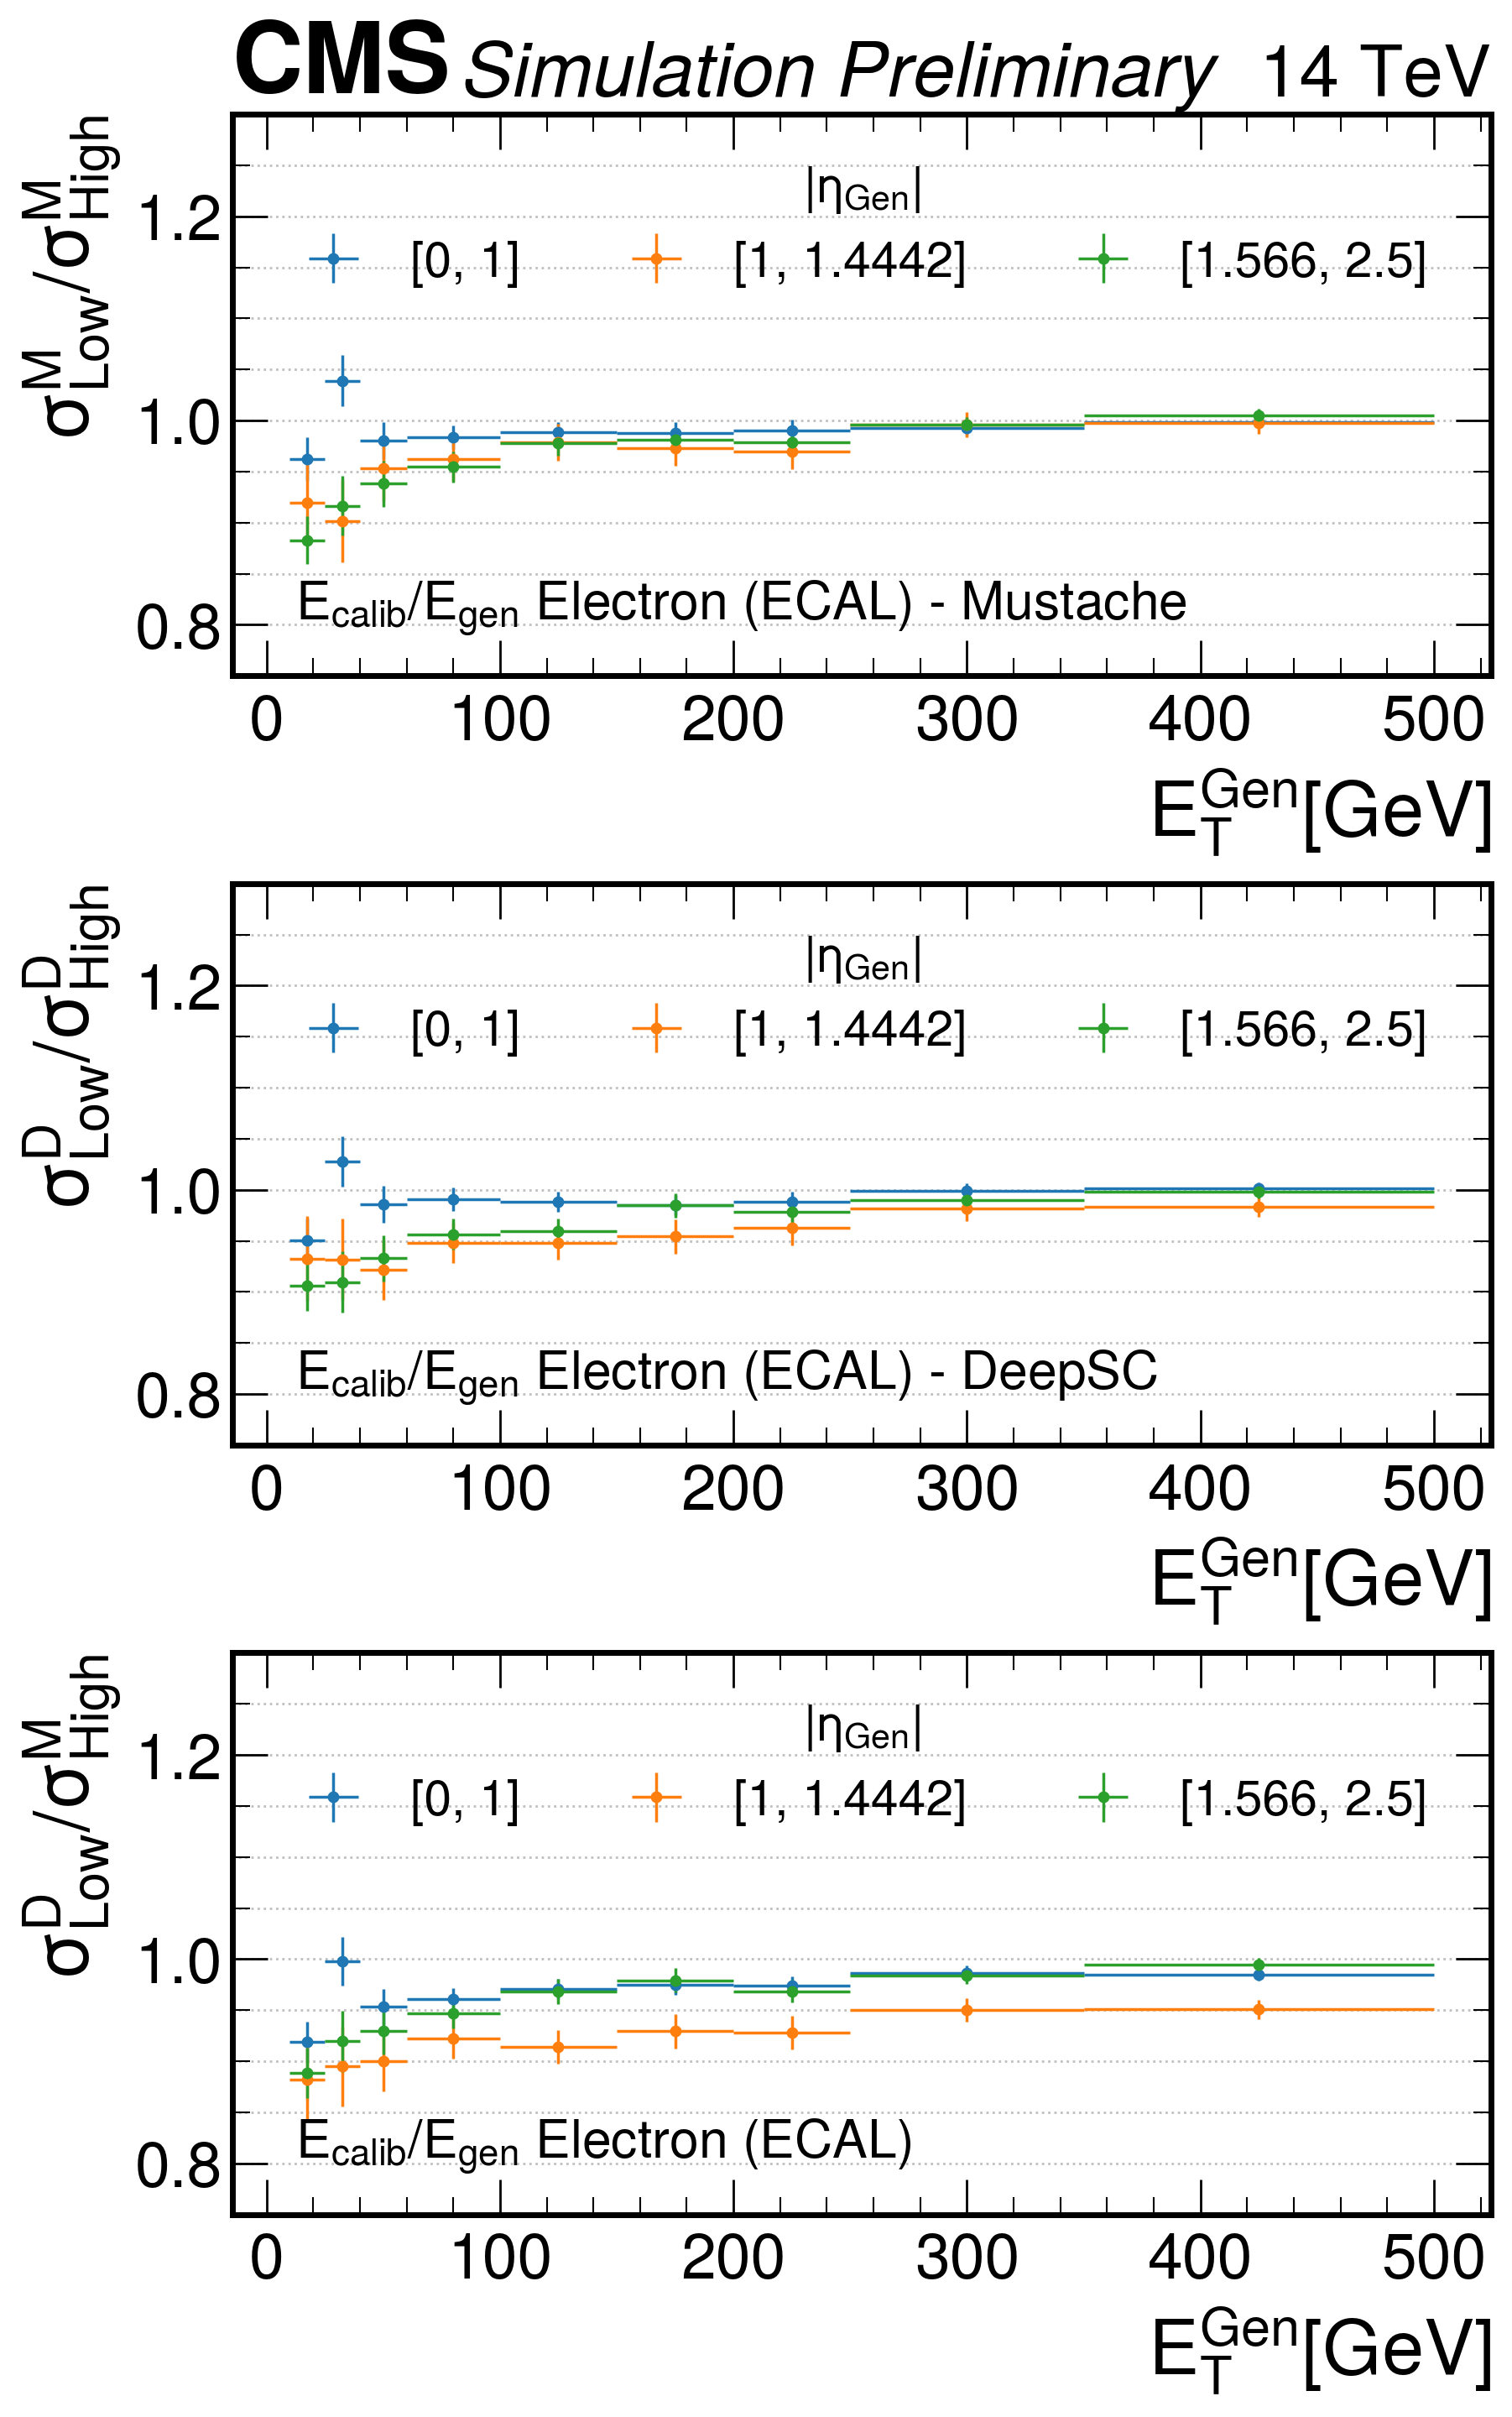

In [164]:

panels_res = [
   {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - Mustache",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^M/\sigma_{High}^M$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    

    
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL) - DeepSC",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^D/\sigma_{High}^D$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },  
    
    
    {
        "file1": input_folder_UL18+'/resolution_ele_SC_genmatched_byEt_cruijff_deepsc.csv',
        "file2": input_folder_34sigma+'/resolution_ele_SC_genmatched_byEt_cruijff_mustache.csv',
        "bins1":[10, 25, 40, 60, 100, 150, 200, 250, 350, 500],
        "bins2":[0, 1, 1.4442, 1.566, 2.5],  
        "binCol1": "et_bin", 
        "binCol2": "eta_bin",
        "exclude_x_bin": None,
        "exclude_y_bin": 2,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)",
        "xlabel":"$E_T^{Gen}[GeV]$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$|\eta_{Gen}|$",
        "ylims":(0.75, 1.3),
    },    
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_total_comparison_Et_supercluster", output=output_folder+"/superclusters")

/tmp/ipykernel_22142/1327182628.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


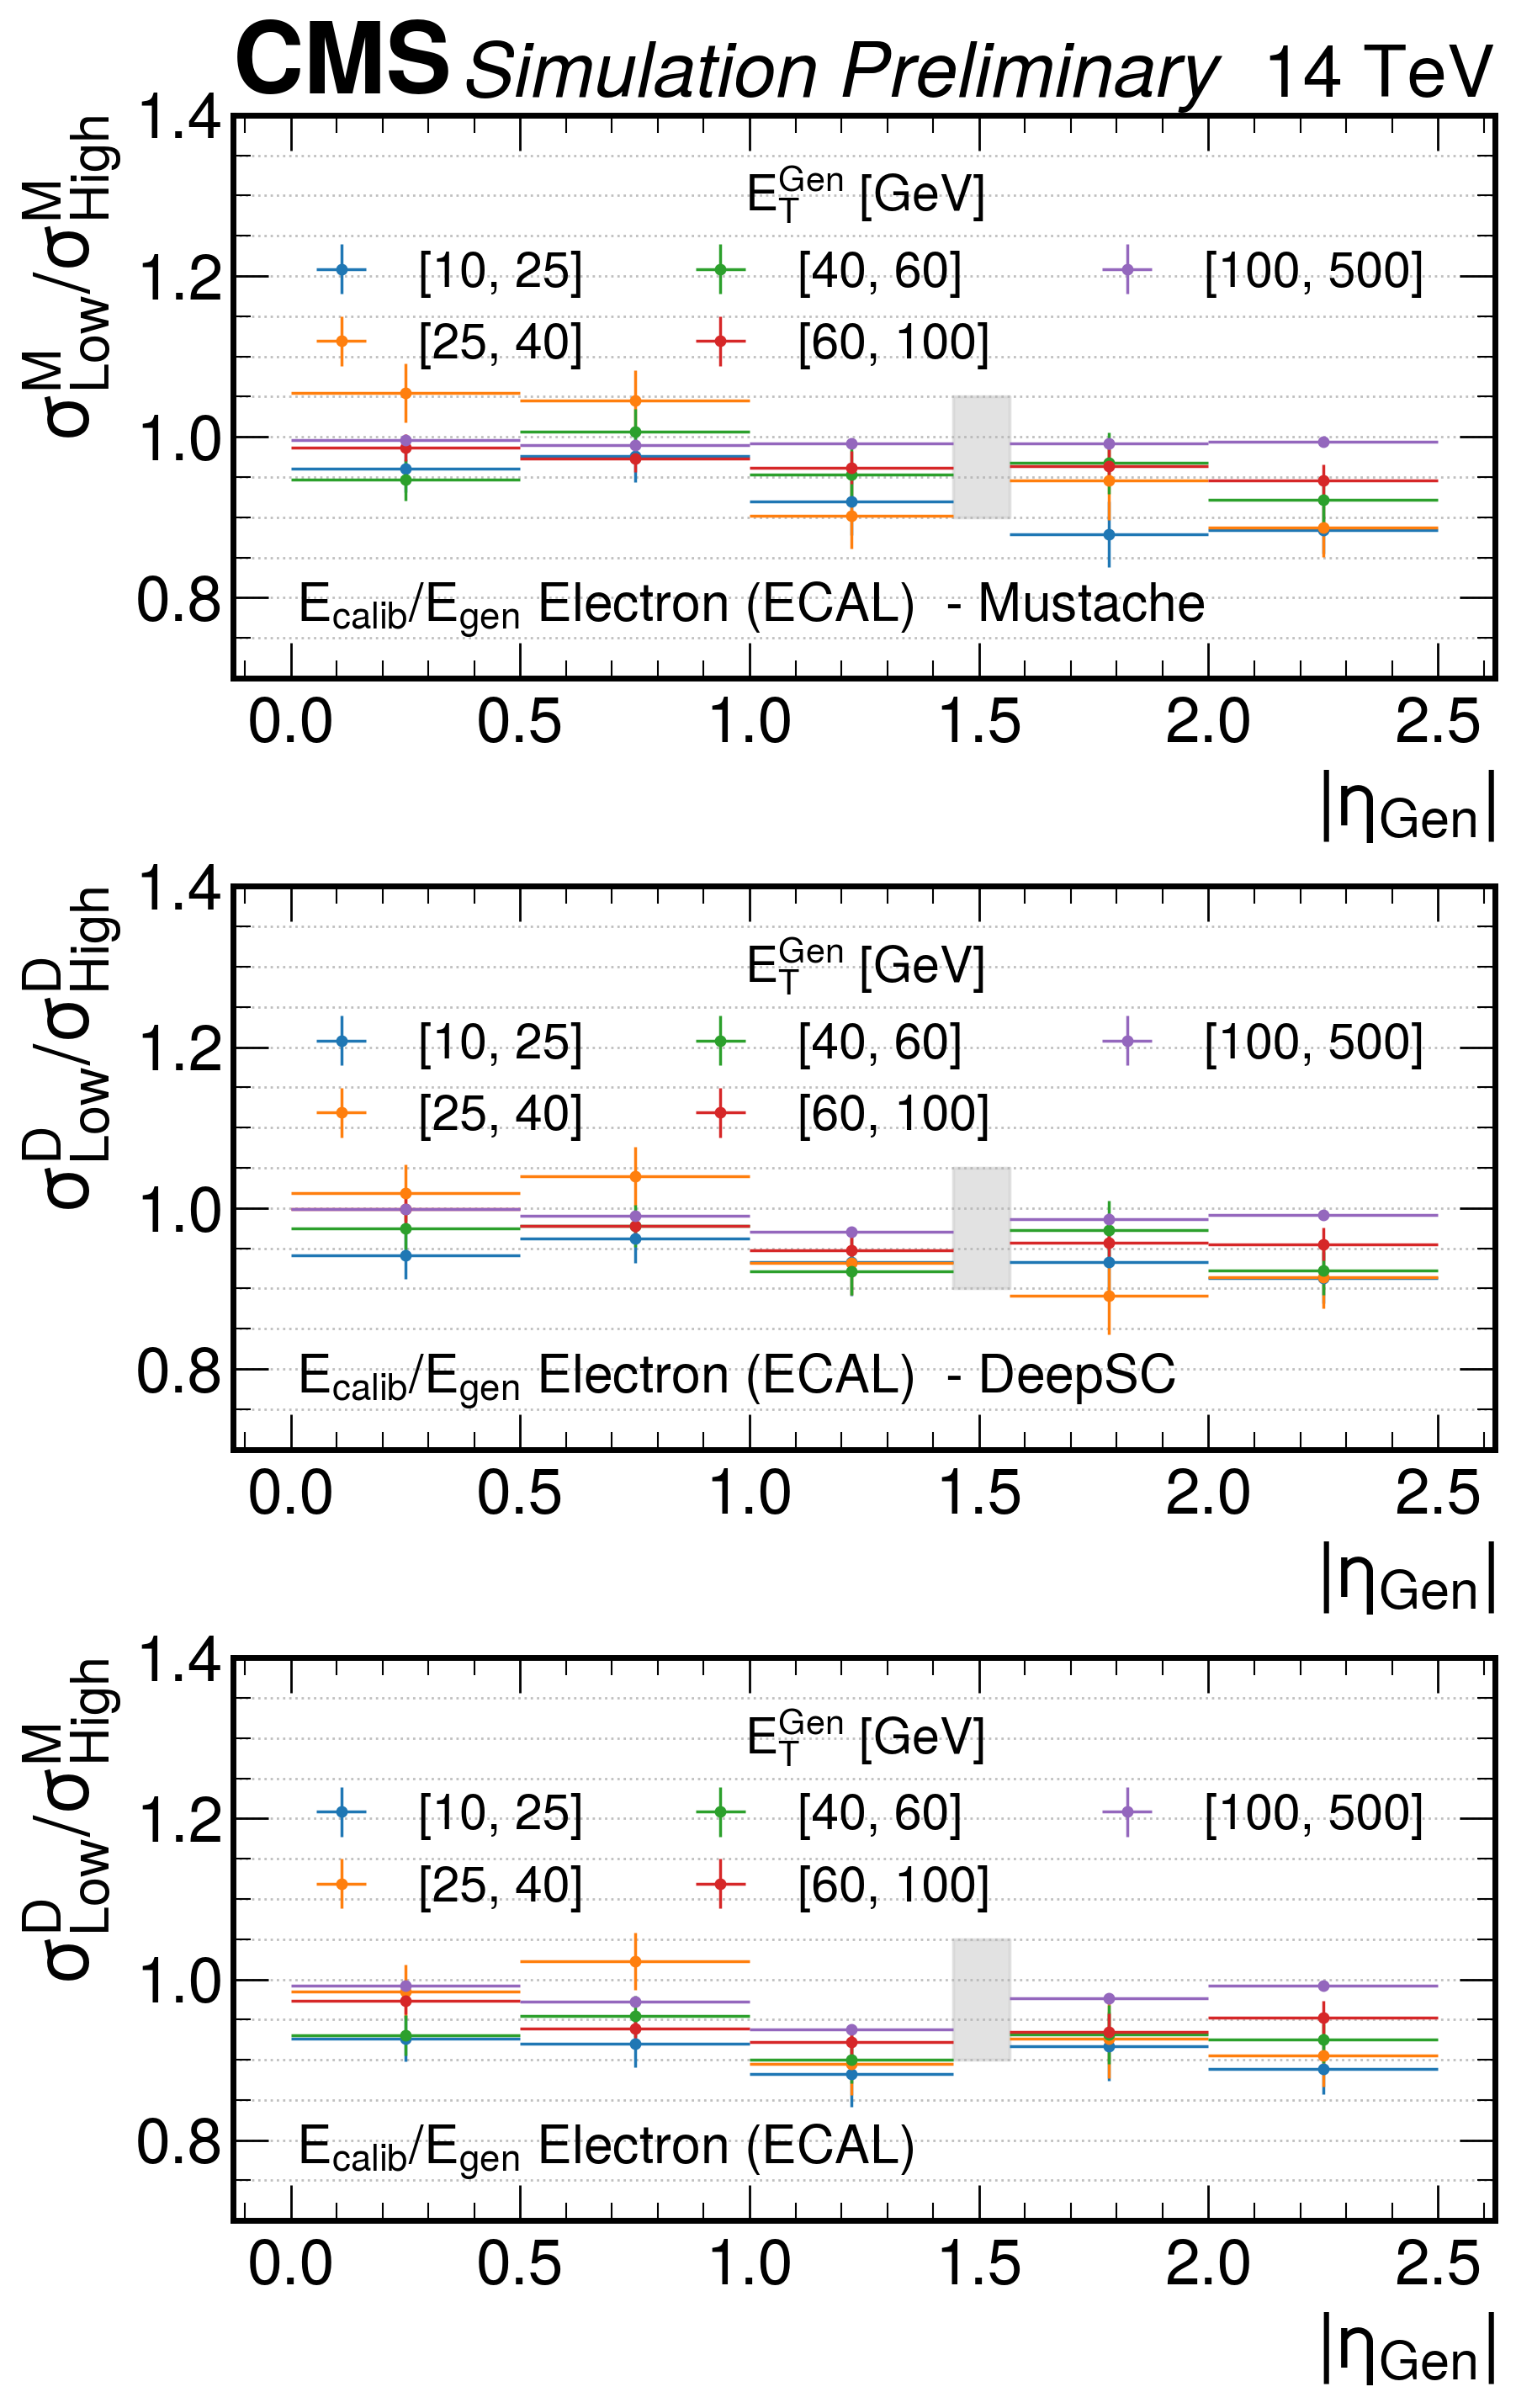

In [165]:

panels_res = [
    {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)  - Mustache",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{M}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
       "ylims":(0.7, 1.4),
    },   

     {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)  - DeepSC",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{D}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    },
    
   {
        "file1": input_folder_UL18   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_deepsc.csv',
        "file2": input_folder_34sigma   +'/resolution_ele_SC_genmatched_byEta_cruijff_sigmaAvg_mustache.csv',
        "bins1":[0, 0.5,1.0,1.4442, 1.566, 2.,2.5],
        "bins2":[10,25, 40, 60,100,500], 
        "binCol1": "eta_bin", 
        "binCol2": "et_bin",
        "exclude_x_bin": 3,
        "exclude_y_bin": None,
        "general_label":"$E_{calib}/E_{gen}$ Electron (ECAL)",
        "xlabel":"$|\eta_{Gen}|$", 
        "ylabel":"$\sigma_{Low}^{D}/\sigma_{High}^{M}$", 
        "yvar":"sigma_avg",
        "yvar_err":"sigma_avg_err",
        "binleg": "$E_T^{Gen}$ [GeV]",
        "fill_between":[1.4442, 1.566],
        "fill_between_y":[0.9, 1.05],
        "ylims":(0.7, 1.4),
    }, 
]

do_summary_plot(panels_res, name="DeepSC_vs_mustache_threshols_total_comparison_Eta_supercluster", output=output_folder+"/superclusters")